In [1]:
import itertools
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from io import StringIO
from IPython.display import Image, display_html
from sklearn import tree
import graphviz
import shap
import lime
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
#kernel dead after importing this
import eli5
from eli5.sklearn import PermutationImportance

2023-07-01 10:11:50.172059: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Import the dataset and check the data


In [3]:
import pandas as pd

df = pd.read_csv("/Users/liyenglee/Downloads/terrance_may27.csv")
df.set_index(df.columns[0], inplace=True)
df

,BvD.ID.number,City,City_1,status,Current Assets to Total Assets,The current ratio,Earnings Before Interest and Taxes (EBIT) to Total Assets,Cash Flow to Total Liabilities,Working Capital to Total Assets,Working Capital to Sales ratio,...,Addedvaluegrowth_t3,Addedvaluegrowth_t2,Addedvaluegrowth_t1,EBITDAgrowth_t3,EBITDAgrowth_t2,EBITDAgrowth_t1,Date.of.incorporation,Major.sectors,Region.in.country,empleogrowth
Column1,,,,,,,,,,,,,,,,,,,,,
1,ESB16318750,CUENCA,CUENCA,0,544147686.0,0.469350,-246579566.0,-0.098430955,-179172929.0,-0.031225442,...,NaN,NaN,0.215812,NaN,NaN,1.588486,05/02/2015,Construction,Castilla-La Mancha,0.500000
2,ESB36941516,VIGO,VIGO,0,306467892.0,4.848974,-147440724.0,-0.206854138,30550891.0,1.851458333,...,-7.128198,-1.676201,36.608979,0.033716,1.597485,36.608979,28/07/2004,Construction,Galicia,NaN
3,ESB18970715,SANTA FE,SANTA FE,0,422895734.0,0.873594,7408389.0,0.015178459,202530846.0,0.12025345,...,1.722546,-0.268485,-0.590949,1.887373,-0.358116,-0.821391,08/08/2011,Wholesale & retail trade,Andalucia,0.000000
4,ESB14741839,CORDOBA,CORDOBA,0,11313652.0,0.086779,-13524857.0,-0.041045757,-7859166.0,-0.82523707,...,-0.715898,0.088555,5.954324,-16.836514,-0.122936,-0.461867,14/12/2005,Other services,Andalucia,1.000000
5,ESB75014068,ERRENTERIA,ERRENTERIA,0,796667011.0,2.027409,166643019.0,0.33696946,170751212.0,0.083893128,...,NaN,NaN,0.102253,NaN,NaN,1.609519,01/01/2010,Other services,Pais Vasco,-0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106053,ESB18550442,PELIGROS,PELIGROS,1,9544339.0,1.626576,2702054.0,-0.000569981,7493949.0,3.99288482,...,0.072344,0.898572,-0.871863,0.234984,0.679106,-0.078368,18/09/1999,Construction,Andalucia,0.000000
106054,ESA43096486,SANTA COLOMA DE QUERALT,SANTA COLOMA DE QUERALT,1,9526824.0,3.731938,-170434.0,-0.485539169,6009647.0,0.282773892,...,0.294187,-0.384678,-0.504340,-0.148203,0.193562,-1.805374,20/12/1985,"Chemicals, rubber, plastics, non-metallic prod...",Cataluna,-0.411765
106055,ESA46156048,VALENCIA,VALENCIA,1,457196.0,0.135951,-469697.0,-0.037770293,257395.0,0.13364869,...,3.215801,-0.088268,-0.242771,-0.942488,-0.084397,1.815535,01/05/1980,Wholesale & retail trade,Comunidad Valenciana,-0.071429


In [64]:
column_names = list(df.columns.values)
column_names

['BvD.ID.number',
 'status',
 'Current Assets to Total Assets',
 'The current ratio',
 ' Earnings Before Interest and Taxes (EBIT) to Total Assets',
 'Cash Flow to Total Liabilities',
 'Working Capital to Total Assets',
 'Working Capital to Sales ratio',
 'Total liability to total assets',
 'Cash to Total Assets',
 'Cash to Current Liabilities',
 'Sales to Capital Employed ratio',
 'logarithm of Total Assets',
 'Sales to Total Assets',
 'Earnings Before Interest and Taxes (EBIT) to Capital Employed',
 'Sales to Current Assets',
 'Current Liabilities to Current Assets',
 'OENEG (tl/ta >1 =1) ',
 'Net Income to Total Assets',
 'INTWO (net profit negative 2 years in a row, 1 0 )',
 'CHIN',
 'NACE.Rev..2.Core.code.(4.digits)',
 'Last.avail..year',
 'X1_4',
 'materialcostgrowth_t3',
 'materialcostgrowth_t2',
 'materialcostgrowth_t1',
 'costempleogrowth_t3',
 'costempleogrowth_t2',
 'costempleogrowth_t1',
 'depamorgrowth_t3',
 'depamorgrowth_t2',
 'depamorgrowth_t1',
 'interestgrowth_t3',
 '

In [91]:
descriptive_stats = df.describe()
print(descriptive_stats)

              status  Current Assets to Total Assets  The current ratio  \
count  106057.000000                    1.060400e+05       1.059880e+05   
mean        0.057111                    1.988532e+07                inf   
std         0.232055                    1.028439e+08                NaN   
min         0.000000                    0.000000e+00       0.000000e+00   
25%         0.000000                    2.557348e+06       7.828451e-01   
50%         0.000000                    6.122398e+06       1.358801e+00   
75%         0.000000                    8.750192e+06       2.952878e+00   
max         1.000000                    1.038273e+09                inf   

        Earnings Before Interest and Taxes (EBIT) to Total Assets  \
count                                       1.060400e+05            
mean                                        1.383970e+06            
std                                         4.600173e+07            
min                                        -5.19

In [65]:
len(column_names)

49

## Data Exploration 
In order to do the data cleaning, it's important to have a good understanding of the data

### Visualizing the regions in the dataset 

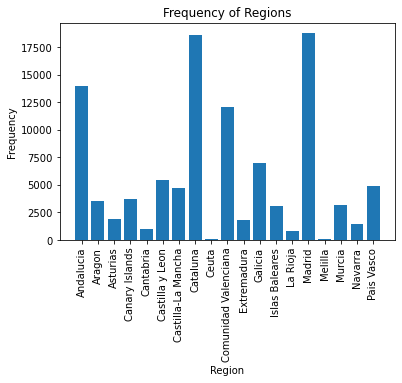

In [58]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called df
# Grouping the DataFrame by 'Region.in.country'
grouped_df = df.groupby('Region.in.country')

# Calculating the frequency of each region
region_counts = grouped_df.size()

# Plotting the frequency of each region
plt.bar(region_counts.index, region_counts.values)
plt.title('Frequency of Regions')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [208]:
# Grouping the DataFrame by 'Region.in.country'
#show the number of operating (0) and bankrupt firms under each country
grouped_df = df.groupby('Region.in.country')

# Initializing variables for the total values of 0 and 1
total_0 = 0
total_1 = 0

# Accessing the 'status' column and calculating the frequency of each status for each group
for region, region_group in grouped_df:
    status_counts = region_group['status'].value_counts().sort_index()
    
    # Printing the status and frequency for the region
    print(f"{region}:")
    for status, frequency in status_counts.items():
        print(f"{status}:{frequency}", end=" ")
        if status == 0:
            total_0 += frequency
        elif status == 1:
            total_1 += frequency
    print("\n")

# Printing the total values of 0 and 1 across all regions
print(f"Total 0: {total_0}")
print(f"Total 1: {total_1}")

Andalucia:
0:13440 1:540 

Aragon:
0:3409 1:117 

Asturias:
0:1867 1:74 

Canary Islands:
0:3328 1:362 

Cantabria:
0:973 1:36 

Castilla y Leon:
0:5102 1:299 

Castilla-La Mancha:
0:4542 1:150 

Cataluna:
0:17600 1:952 

Ceuta:
0:73 1:6 

Comunidad Valenciana:
0:11245 1:797 

Extremadura:
0:1761 1:72 

Galicia:
0:6672 1:283 

Islas Baleares:
0:2711 1:353 

La Rioja:
0:770 1:39 

Madrid:
0:17406 1:1370 

Melilla:
0:63 1:3 

Murcia:
0:2909 1:302 

Navarra:
0:1444 1:46 

Pais Vasco:
0:4683 1:255 

Total 0: 99998
Total 1: 6056


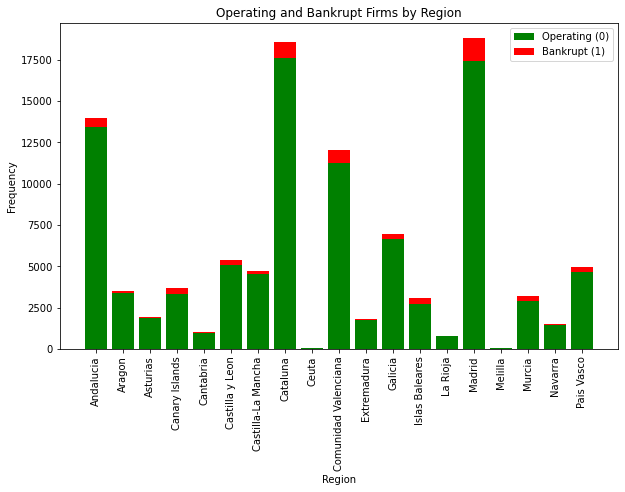

Total 0: 99998
Total 1: 6056


In [209]:
#show it as a graph
# Grouping the DataFrame by 'Region.in.country'
grouped_df = df.groupby('Region.in.country')

# Initializing variables for the total values of 0 and 1
total_0 = 0
total_1 = 0

# Initializing lists to store region names and status frequencies
regions = []
status_0_freq = []
status_1_freq = []

# Accessing the 'status' column and calculating the frequency of each status for each group
for region, region_group in grouped_df:
    status_counts = region_group['status'].value_counts().sort_index()
    
    # Storing the region name and status frequencies
    regions.append(region)
    status_0_freq.append(status_counts[0])
    status_1_freq.append(status_counts[1])
    
    # Updating the total values of 0 and 1
    total_0 += status_counts[0]
    total_1 += status_counts[1]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(regions, status_0_freq, label='Operating (0)', color='green')
plt.bar(regions, status_1_freq, bottom=status_0_freq, label='Bankrupt (1)', color='red')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Operating and Bankrupt Firms by Region')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Printing the total values of 0 and 1 across all regions
print(f"Total 0: {total_0}")
print(f"Total 1: {total_1}")

We see from our graph that Cataluna and Madrid are the two regions with the most data in dataset. This observation makes sense as these two regions are cities with many businesses and corporations as well as large population.



### Visualizing sectors 

In [210]:
# Grouping the DataFrame by 'Region.in.country'
#show the number of operating (0) and bankrupt firms under each country
grouped_sectors_df = df.groupby('Major.sectors')

# Initializing variables for the total values of 0 and 1
total_0 = 0
total_1 = 0

# Accessing the 'status' column and calculating the frequency of each status for each group
for region, region_group in grouped_sectors_df:
    status_counts = region_group['status'].value_counts().sort_index()
    
    # Printing the status and frequency for the region
    print(f"{region}:")
    for status, frequency in status_counts.items():
        print(f"{status}:{frequency}", end=" ")
        if status == 0:
            total_0 += frequency
        elif status == 1:
            total_1 += frequency
    print("\n")

# Printing the total values of 0 and 1 across all regions
print(f"Total 0: {total_0}")
print(f"Total 1: {total_1}")

Banks:
0:3 

Chemicals, rubber, plastics, non-metallic products:
0:1543 1:186 

Construction:
0:17367 1:1940 

Education, Health:
0:4341 1:78 

Food, beverages, tobacco:
0:2048 1:154 

Gas, Water, Electricity:
0:1792 1:22 

Hotels & restaurants:
0:6681 1:258 

Insurance companies:
0:1 

Machinery, equipment, furniture, recycling:
0:3265 1:339 

Metals & metal products:
0:2519 1:240 

Other services:
0:24141 1:898 

Post & telecommunications:
0:426 1:25 

Primary sector:
0:3608 1:102 

Public administration & defense:
0:22 1:2 

Publishing, printing:
0:1381 1:120 

Textiles, wearing apparel, leather:
0:1039 1:141 

Transport:
0:4411 1:216 

Wholesale & retail trade:
0:24597 1:1261 

Wood, cork, paper:
0:814 1:73 

Total 0: 99999
Total 1: 6055


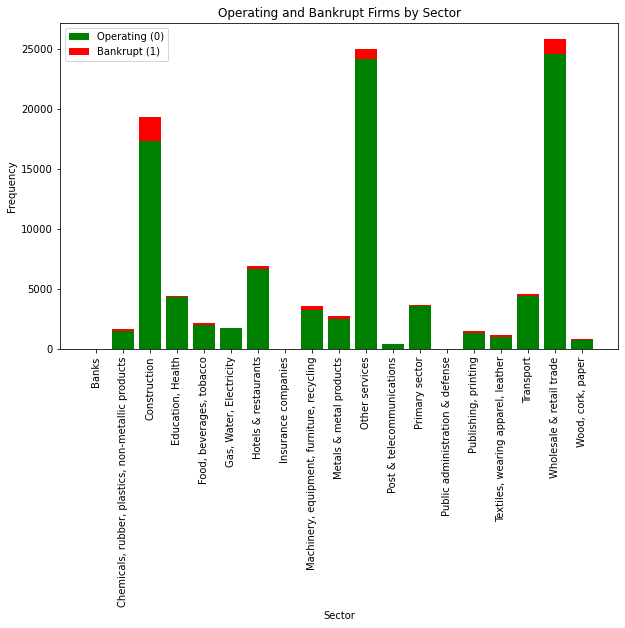

Total 0: 99999
Total 1: 6055


In [215]:
# Grouping the DataFrame by 'Major.sectors'
grouped_df = df.groupby('Major.sectors')

# Initializing variables for the total values of 0 and 1
total_0 = 0
total_1 = 0

# Initializing lists to store sector names and status frequencies
sectors = []
status_0_freq = []
status_1_freq = []

# Accessing the 'status' column and calculating the frequency of each status for each group
for sector, sector_group in grouped_df:
    status_counts = sector_group['status'].value_counts().sort_index()
    
    # Storing the sector name and status frequencies
    sectors.append(sector)
    status_0_freq.append(status_counts.get(0, 0)) # Use get to avoid KeyErrors when the status doesn't exist
    status_1_freq.append(status_counts.get(1, 0)) # Use get to avoid KeyErrors when the status doesn't exist
    
    # Updating the total values of 0 and 1
    total_0 += status_counts.get(0, 0)
    total_1 += status_counts.get(1, 0)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sectors, status_0_freq, label='Operating (0)', color='green')
plt.bar(sectors, status_1_freq, bottom=status_0_freq, label='Bankrupt (1)', color='red')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.title('Operating and Bankrupt Firms by Sector')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Printing the total values of 0 and 1 across all sectors
print(f"Total 0: {total_0}")
print(f"Total 1: {total_1}")

### Visualizing the information regarding status

In [6]:
#the number of bankruptcy 
df.status.value_counts()


0    100000
1      6057
Name: status, dtype: int64

Based on this information, we can infer that there are a total of 100,000 non-bankrupt companies and 6,057 bankrupt companies in the dataset. The majority of companies are classified as non-bankrupt (value '0'), while a smaller portion are classified as bankrupt (value '1').

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106057 entries, 1 to 106057
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   BvD.ID.number                                                  106057 non-null  object 
 1   City                                                           106053 non-null  object 
 2   City_1                                                         106053 non-null  object 
 3   status                                                         106057 non-null  int64  
 4   Current Assets to Total Assets                                 106040 non-null  float64
 5   The current ratio                                              105988 non-null  float64
 6    Earnings Before Interest and Taxes (EBIT) to Total Assets     106040 non-null  float64
 7   Cash Flow to Total Liabilities                 

### change the columns from object to a numerical value 

In [9]:
columns_to_convert = ['Cash Flow to Total Liabilities', 'Working Capital to Sales ratio', 'Earnings Before Interest and Taxes (EBIT) to Capital Employed']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

### drop columns containing same information 

We have detect the following columns to be unecessary for the machine learning:

- City and City_1 contain the same information so we will drop City_1 

- NACE.Rev..2.main.section and NACE.Rev..2.Core.code.(4.digits) provide the same information. Since NACE.Rev..2.main.section would need encoding later on, we decide to just use NACE.Rev..2.Core.code.(4.digits)

- BvD.ID.number is not necessary for the training of the machine learning, but for the following data cleaning steps it might be highly useful as it corresponds to the unique element for each company. We will keep it for now and deal with it when it comes to the machine learning training.

- City and Region provide similar information, for better interpretability larer on, we decide to keep region 


In [219]:
df = df.drop(['City_1','City', 'NACE.Rev..2.main.section', "X1_4", "OENEG (tl/ta >1 =1)"], axis=1)

KeyError: "['City_1', 'City', 'NACE.Rev..2.main.section', 'OENEG (tl/ta >1 =1)'] not found in axis"

In [60]:
df

,BvD.ID.number,status,Current Assets to Total Assets,The current ratio,Earnings Before Interest and Taxes (EBIT) to Total Assets,Cash Flow to Total Liabilities,Working Capital to Total Assets,Working Capital to Sales ratio,Total liability to total assets,Cash to Total Assets,...,Addedvaluegrowth_t3,Addedvaluegrowth_t2,Addedvaluegrowth_t1,EBITDAgrowth_t3,EBITDAgrowth_t2,EBITDAgrowth_t1,Date.of.incorporation,Major.sectors,Region.in.country,empleogrowth
Column1,,,,,,,,,,,,,,,,,,,,,
1,ESB16318750,0,544147686.0,0.469350,-246579566.0,-0.098431,-179172929.0,-0.031225,1.159363e+09,388060277.0,...,NaN,NaN,0.215812,NaN,NaN,1.588486,05/02/2015,Construction,Castilla-La Mancha,0.500000
2,ESB36941516,0,306467892.0,4.848974,-147440724.0,-0.206854,30550891.0,1.851458,7.128135e+08,958982.0,...,-7.128198,-1.676201,36.608979,0.033716,1.597485,36.608979,28/07/2004,Construction,Galicia,NaN
3,ESB18970715,0,422895734.0,0.873594,7408389.0,0.015178,202530846.0,0.120253,7.060251e+08,91120939.0,...,1.722546,-0.268485,-0.590949,1.887373,-0.358116,-0.821391,08/08/2011,Wholesale & retail trade,Andalucia,0.000000
4,ESB14741839,0,11313652.0,0.086779,-13524857.0,-0.041046,-7859166.0,-0.825237,1.306500e+07,7410387.0,...,-0.715898,0.088555,5.954324,-16.836514,-0.122936,-0.461867,14/12/2005,Other services,Andalucia,1.000000
5,ESB75014068,0,796667011.0,2.027409,166643019.0,0.336969,170751212.0,0.083893,6.935043e+08,607877154.0,...,NaN,NaN,0.102253,NaN,NaN,1.609519,01/01/2010,Other services,Pais Vasco,-0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106053,ESB18550442,1,9544339.0,1.626576,2702054.0,-0.000570,7493949.0,3.992885,9.745711e+06,2689941.0,...,0.072344,0.898572,-0.871863,0.234984,0.679106,-0.078368,18/09/1999,Construction,Andalucia,0.000000
106054,ESA43096486,1,9526824.0,3.731938,-170434.0,-0.485539,6009647.0,0.282774,2.552782e+06,2784835.0,...,0.294187,-0.384678,-0.504340,-0.148203,0.193562,-1.805374,20/12/1985,"Chemicals, rubber, plastics, non-metallic prod...",Cataluna,-0.411765
106055,ESA46156048,1,457196.0,0.135951,-469697.0,-0.037770,257395.0,0.133649,1.235739e+06,4750705.0,...,3.215801,-0.088268,-0.242771,-0.942488,-0.084397,1.815535,01/05/1980,Wholesale & retail trade,Comunidad Valenciana,-0.071429


## Find the Missing data in columns 

In [106]:
# Find missing values
missing_values = df.isnull().sum()

# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]
#sort the missing values to the largest first 

columns_with_missing_sorted = columns_with_missing.sort_values(ascending=False)

# Print the columns with missing values and their counts
print("Columns with missing values:")
print(columns_with_missing_sorted)


Columns with missing values:
interestgrowth_t3                                                41312
depamorgrowth_t3                                                 39830
interestgrowth_t2                                                38747
depamorgrowth_t2                                                 36954
interestgrowth_t1                                                36168
materialcostgrowth_t3                                            34914
empleogrowth                                                     33716
depamorgrowth_t1                                                 33708
costempleogrowth_t3                                              32146
materialcostgrowth_t2                                            31135
costempleogrowth_t2                                              28621
materialcostgrowth_t1                                            27295
costempleogrowth_t1                                              24977
EBITDAgrowth_t3                                 

In [101]:
#the number of columns with missing values 
len(columns_with_missing)

18

In [105]:
#the total of missing values
total_missing_values = columns_with_missing.sum()
total_missing_values

1422

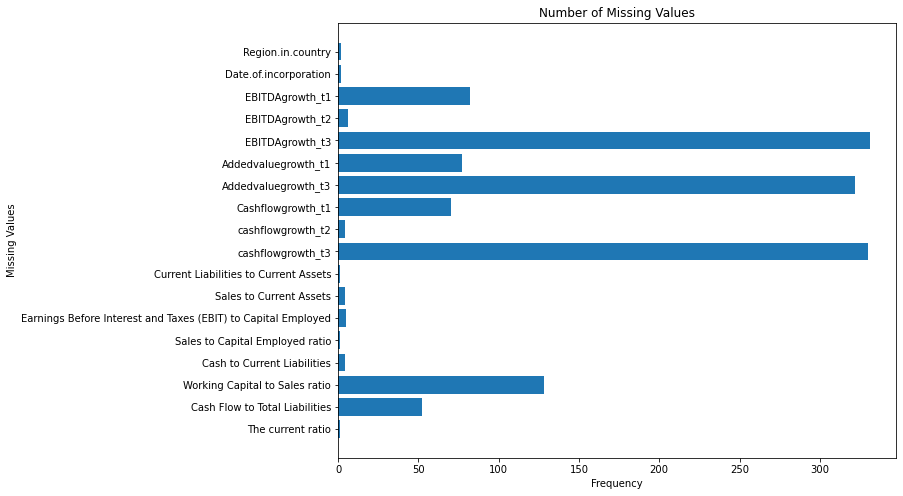

In [99]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
plt.barh(columns_with_missing.index, columns_with_missing.values)
plt.title("Number of Missing Values")
plt.xlabel('Frequency')
plt.ylabel('Missing Values')
plt.savefig('missingvalues.png', bbox_inches='tight')  # Save the graph with tight bounding box
plt.show()


We are dropping all variables that have more than 20'000 missing values as imputing them without make sense and probably corrupted our model. We went from 52 columns to 39 columns, we dropped a total of 11 columns. 

In [12]:
variables_to_drop = [var for var, count in variables.items() if count > 20000]

# Drop the variables from the DataFrame
df_1 = df.drop(variables_to_drop, axis=1)

# Display the resulting DataFrame
df_1

,BvD.ID.number,status,Current Assets to Total Assets,The current ratio,Earnings Before Interest and Taxes (EBIT) to Total Assets,Cash Flow to Total Liabilities,Working Capital to Total Assets,Working Capital to Sales ratio,Total liability to total assets,Cash to Total Assets,...,Cashflowgrowth_t1,Addedvaluegrowth_t3,Addedvaluegrowth_t2,Addedvaluegrowth_t1,EBITDAgrowth_t3,EBITDAgrowth_t2,EBITDAgrowth_t1,Date.of.incorporation,Major.sectors,Region.in.country
Column1,,,,,,,,,,,,,,,,,,,,,
1,ESB16318750,0,544147686.0,0.469350,-246579566.0,-0.098431,-179172929.0,-0.031225,1.159363e+09,388060277.0,...,0.231697,NaN,NaN,0.215812,NaN,NaN,1.588486,05/02/2015,Construction,Castilla-La Mancha
2,ESB36941516,0,306467892.0,4.848974,-147440724.0,-0.206854,30550891.0,1.851458,7.128135e+08,958982.0,...,36.537212,-7.128198,-1.676201,36.608979,0.033716,1.597485,36.608979,28/07/2004,Construction,Galicia
3,ESB18970715,0,422895734.0,0.873594,7408389.0,0.015178,202530846.0,0.120253,7.060251e+08,91120939.0,...,-0.825609,1.722546,-0.268485,-0.590949,1.887373,-0.358116,-0.821391,08/08/2011,Wholesale & retail trade,Andalucia
4,ESB14741839,0,11313652.0,0.086779,-13524857.0,-0.041046,-7859166.0,-0.825237,1.306500e+07,7410387.0,...,-0.475961,-0.715898,0.088555,5.954324,-16.836514,-0.122936,-0.461867,14/12/2005,Other services,Andalucia
5,ESB75014068,0,796667011.0,2.027409,166643019.0,0.336969,170751212.0,0.083893,6.935043e+08,607877154.0,...,1.485595,NaN,NaN,0.102253,NaN,NaN,1.609519,01/01/2010,Other services,Pais Vasco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106053,ESB18550442,1,9544339.0,1.626576,2702054.0,-0.000570,7493949.0,3.992885,9.745711e+06,2689941.0,...,-1.558215,0.072344,0.898572,-0.871863,0.234984,0.679106,-0.078368,18/09/1999,Construction,Andalucia
106054,ESA43096486,1,9526824.0,3.731938,-170434.0,-0.485539,6009647.0,0.282774,2.552782e+06,2784835.0,...,-18.458680,0.294187,-0.384678,-0.504340,-0.148203,0.193562,-1.805374,20/12/1985,"Chemicals, rubber, plastics, non-metallic prod...",Cataluna
106055,ESA46156048,1,457196.0,0.135951,-469697.0,-0.037770,257395.0,0.133649,1.235739e+06,4750705.0,...,5.491107,3.215801,-0.088268,-0.242771,-0.942488,-0.084397,1.815535,01/05/1980,Wholesale & retail trade,Comunidad Valenciana


## Find the missing values in each company 

We observed that a lot of companies have a lot missing data. Therefore, we decide to clean our data by company. In order to do so, we first explore the distribution of missing data in each company.

We would do this by trying different threshold: 10% , 20% , 30% (e.g the top 10% of companies with the highest missing data) 

### 10% threshold

In [13]:
import pandas as pd

# Calculate the number of missing values per company
missing_data_counts = df_1.isnull().sum(axis=1)

# Calculate the percentage of missing values per company
missing_data_percentage = (missing_data_counts / len(df_1.columns)) * 100

# Create a new DataFrame to store the missing data distribution
missing_data_distribution = pd.DataFrame({'Company': df_1['BvD.ID.number'], 'Missing Data Percentage': missing_data_percentage})

# Sort the DataFrame by the missing data percentage in descending order
missing_data_distribution = missing_data_distribution.sort_values(by='Missing Data Percentage', ascending=False)

# Calculate the number of companies to select based on the top 10% threshold
num_companies = int(len(missing_data_distribution) * 0.1)

# Select the top 10% of companies with the most missing data
top_10_percent = missing_data_distribution.head(num_companies)

# Print the top 10% of companies with the most missing data
print(top_10_percent)


             Company  Missing Data Percentage
Column1                                      
77600    ESB87258745                66.666667
64223    ESB57714529                63.888889
85999    ESB57714537                63.888889
44273    ESB91931741                44.444444
59302    ESB93108553                44.444444
...              ...                      ...
27487    ESB66005109                16.666667
72903    ESB51034296                16.666667
84152    ESB04790200                16.666667
84150    ESB57786097                16.666667
42031    ESB97433841                16.666667

[10605 rows x 2 columns]


### 15% threshold

In [14]:
import pandas as pd


# Calculate the number of missing values per company
missing_data_counts = df_1.isnull().sum(axis=1)

# Calculate the percentage of missing values per company
missing_data_percentage = (missing_data_counts / len(df_1.columns)) * 100

# Create a new DataFrame to store the missing data distribution
missing_data_distribution = pd.DataFrame({'Company': df_1['BvD.ID.number'], 'Missing Data Percentage': missing_data_percentage})

# Sort the DataFrame by the missing data percentage in descending order
missing_data_distribution = missing_data_distribution.sort_values(by='Missing Data Percentage', ascending=False)

# Calculate the number of companies to select based on the top 10% threshold
num_companies = int(len(missing_data_distribution) * 0.15)

# Select the top 10% of companies with the most missing data
top_15_percent = missing_data_distribution.head(num_companies)

# Print the top 10% of companies with the most missing data
print(top_15_percent)

             Company  Missing Data Percentage
Column1                                      
77600    ESB87258745                66.666667
64223    ESB57714529                63.888889
85999    ESB57714537                63.888889
44273    ESB91931741                44.444444
59302    ESB93108553                44.444444
...              ...                      ...
63033    ESB98576242                 8.333333
22451    ESB45820172                 8.333333
43099    ESB64861727                 8.333333
4923     ESB02555720                 8.333333
7757     ESB65571135                 8.333333

[15908 rows x 2 columns]


### 20% threshold 

In [15]:
import pandas as pd

# Calculate the number of missing values per company
missing_data_counts = df_1.isnull().sum(axis=1)

# Calculate the percentage of missing values per company
missing_data_percentage = (missing_data_counts / len(df_1.columns)) * 100

# Create a new DataFrame to store the missing data distribution
missing_data_distribution = pd.DataFrame({'Company': df_1['BvD.ID.number'], 'Missing Data Percentage': missing_data_percentage})

# Sort the DataFrame by the missing data percentage in descending order
missing_data_distribution = missing_data_distribution.sort_values(by='Missing Data Percentage', ascending=False)

# Calculate the number of companies to select based on the top 20% threshold
num_companies = int(len(missing_data_distribution) * 0.2)

# Select the top 20% of companies with the most missing data
top_20_percent = missing_data_distribution.head(num_companies)

# Print the top 20% of companies with the most missing data
print(top_20_percent)


             Company  Missing Data Percentage
Column1                                      
77600    ESB87258745                66.666667
64223    ESB57714529                63.888889
85999    ESB57714537                63.888889
44273    ESB91931741                44.444444
59302    ESB93108553                44.444444
...              ...                      ...
57246    ESB83720821                 2.777778
44818    ESA78493160                 2.777778
73934    ESB92849090                 2.777778
56599    ESB74202235                 2.777778
44809    ESB13376132                 2.777778

[21211 rows x 2 columns]


### 30% threshold

In [16]:
#we try for the 30% theshold 
import pandas as pd

# Calculate the number of missing values per company
missing_data_counts = df_1.isnull().sum(axis=1)

# Calculate the percentage of missing values per company
missing_data_percentage = (missing_data_counts / len(df_1.columns)) * 100

# Create a new DataFrame to store the missing data distribution
missing_data_distribution = pd.DataFrame({'Company': df_1['BvD.ID.number'], 'Missing Data Percentage': missing_data_percentage})

# Sort the DataFrame by the missing data percentage in descending order
missing_data_distribution = missing_data_distribution.sort_values(by='Missing Data Percentage', ascending=False)

# Calculate the number of companies to select based on the top 30% threshold
num_companies = int(len(missing_data_distribution) * 0.3)

# Select the top 30% of companies with the most missing data
top_30_percent = missing_data_distribution.head(num_companies)

# Print the top 30% of companies with the most missing data
print(top_30_percent)


             Company  Missing Data Percentage
Column1                                      
77600    ESB87258745                66.666667
64223    ESB57714529                63.888889
85999    ESB57714537                63.888889
44273    ESB91931741                44.444444
59302    ESB93108553                44.444444
...              ...                      ...
70657    ESB55539340                 0.000000
70658    ESB06326144                 0.000000
62685    ESB58457656                 0.000000
70659    ESB11894094                 0.000000
62686    ESB85287985                 0.000000

[31817 rows x 2 columns]


Our goal is remove only to certain extent as we want to keep some missing data. It could be relevant for the model training later. Removing 20% seems to most ideal.

In [107]:
import pandas as pd

# Calculate the number of missing values per company
missing_data_counts = df_1.isnull().sum(axis=1)

# Calculate the percentage of missing values per company
missing_data_percentage = (missing_data_counts / len(df_1.columns)) * 100

# Create a new DataFrame to store the missing data distribution
missing_data_distribution = pd.DataFrame({'Company': df_1['BvD.ID.number'], 'Missing Data Percentage': missing_data_percentage})

# Sort the DataFrame by the missing data percentage in descending order
missing_data_distribution = missing_data_distribution.sort_values(by='Missing Data Percentage', ascending=False)

# Calculate the number of companies to drop based on the top 10% threshold
num_companies = int(len(missing_data_distribution) * 0.20)

# Get the index values of the companies to drop
companies_to_drop = missing_data_distribution.head(num_companies).index

# Drop the companies from the dataset
df_2 = df_1.drop(companies_to_drop)

# Print the updated dataset
df_2

,BvD.ID.number,status,Current Assets to Total Assets,The current ratio,Earnings Before Interest and Taxes (EBIT) to Total Assets,Cash Flow to Total Liabilities,Working Capital to Total Assets,Working Capital to Sales ratio,Total liability to total assets,Cash to Total Assets,...,Cashflowgrowth_t1,Addedvaluegrowth_t3,Addedvaluegrowth_t2,Addedvaluegrowth_t1,EBITDAgrowth_t3,EBITDAgrowth_t2,EBITDAgrowth_t1,Date.of.incorporation,Major.sectors,Region.in.country
Column1,,,,,,,,,,,,,,,,,,,,,
2,ESB36941516,0,306467892.0,4.848974,-147440724.0,-0.206854,30550891.0,1.851458,712813512.0,958982.0,...,36.537212,-7.128198,-1.676201,36.608979,0.033716,1.597485,36.608979,28/07/2004,Construction,Galicia
3,ESB18970715,0,422895734.0,0.873594,7408389.0,0.015178,202530846.0,0.120253,706025099.0,91120939.0,...,-0.825609,1.722546,-0.268485,-0.590949,1.887373,-0.358116,-0.821391,08/08/2011,Wholesale & retail trade,Andalucia
4,ESB14741839,0,11313652.0,0.086779,-13524857.0,-0.041046,-7859166.0,-0.825237,13064997.0,7410387.0,...,-0.475961,-0.715898,0.088555,5.954324,-16.836514,-0.122936,-0.461867,14/12/2005,Other services,Andalucia
6,ESB43865260,0,417746161.0,21.729029,-7634767.0,9.420329,19723772.0,0.132128,19225257.0,12213634.0,...,0.760363,-0.129894,-0.051853,0.798926,-0.103985,0.481662,-0.224548,27/07/2006,"Gas, Water, Electricity",Cataluna
7,ESB73299141,0,402948154.0,0.603586,6521106.0,0.007325,402500754.0,inf,667590078.0,450001.0,...,-0.478936,2.895349,-4.739552,-0.499701,2.895349,-4.739552,-0.499701,06/04/2004,Construction,Murcia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106053,ESB18550442,1,9544339.0,1.626576,2702054.0,-0.000570,7493949.0,3.992885,9745711.0,2689941.0,...,-1.558215,0.072344,0.898572,-0.871863,0.234984,0.679106,-0.078368,18/09/1999,Construction,Andalucia
106054,ESA43096486,1,9526824.0,3.731938,-170434.0,-0.485539,6009647.0,0.282774,2552782.0,2784835.0,...,-18.458680,0.294187,-0.384678,-0.504340,-0.148203,0.193562,-1.805374,20/12/1985,"Chemicals, rubber, plastics, non-metallic prod...",Cataluna
106055,ESA46156048,1,457196.0,0.135951,-469697.0,-0.037770,257395.0,0.133649,1235739.0,4750705.0,...,5.491107,3.215801,-0.088268,-0.242771,-0.942488,-0.084397,1.815535,01/05/1980,Wholesale & retail trade,Comunidad Valenciana


In [108]:
# Find missing values
missing_values = df_2.isnull().sum()

# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Print the columns with missing values and their counts
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Cash Flow to Total Liabilities                                   164
Working Capital to Sales ratio                                   537
Cash to Current Liabilities                                        9
Earnings Before Interest and Taxes (EBIT) to Capital Employed      8
Sales to Current Assets                                            1
CHIN                                                              21
cashflowgrowth_t3                                                 18
Cashflowgrowth_t1                                                  8
Addedvaluegrowth_t3                                                5
Addedvaluegrowth_t1                                                2
EBITDAgrowth_t3                                                    9
EBITDAgrowth_t1                                                   11
Date.of.incorporation                                             31
Region.in.country                                                  1
dtype

## Dealing with outliers

We are only dealing with variables that are continued. 

In [181]:
variables = [
    'Current Assets to Total Assets',
    'The current ratio',
    ' Earnings Before Interest and Taxes (EBIT) to Total Assets',
    'Cash Flow to Total Liabilities',
    'Working Capital to Total Assets',
    'Working Capital to Sales ratio',
    'Total liability to total assets',
    'Cash to Total Assets',
    'Cash to Current Liabilities',
    'Sales to Capital Employed ratio',
    'logarithm of Total Assets',
    'Sales to Total Assets',
    'Earnings Before Interest and Taxes (EBIT) to Capital Employed',
    'Sales to Current Assets',
    'Current Liabilities to Current Assets',
    'Net Income to Total Assets',
    'cashflowgrowth_t3',
    'cashflowgrowth_t2',
    'Cashflowgrowth_t1',
    'Addedvaluegrowth_t3',
    'Addedvaluegrowth_t2',
    'Addedvaluegrowth_t1',
    'EBITDAgrowth_t3',
    'EBITDAgrowth_t2',
    'EBITDAgrowth_t1'
]
print(variables)

['Current Assets to Total Assets', 'The current ratio', ' Earnings Before Interest and Taxes (EBIT) to Total Assets', 'Cash Flow to Total Liabilities', 'Working Capital to Total Assets', 'Working Capital to Sales ratio', 'Total liability to total assets', 'Cash to Total Assets', 'Cash to Current Liabilities', 'Sales to Capital Employed ratio', 'logarithm of Total Assets', 'Sales to Total Assets', 'Earnings Before Interest and Taxes (EBIT) to Capital Employed', 'Sales to Current Assets', 'Current Liabilities to Current Assets', 'Net Income to Total Assets', 'cashflowgrowth_t3', 'cashflowgrowth_t2', 'Cashflowgrowth_t1', 'Addedvaluegrowth_t3', 'Addedvaluegrowth_t2', 'Addedvaluegrowth_t1', 'EBITDAgrowth_t3', 'EBITDAgrowth_t2', 'EBITDAgrowth_t1']


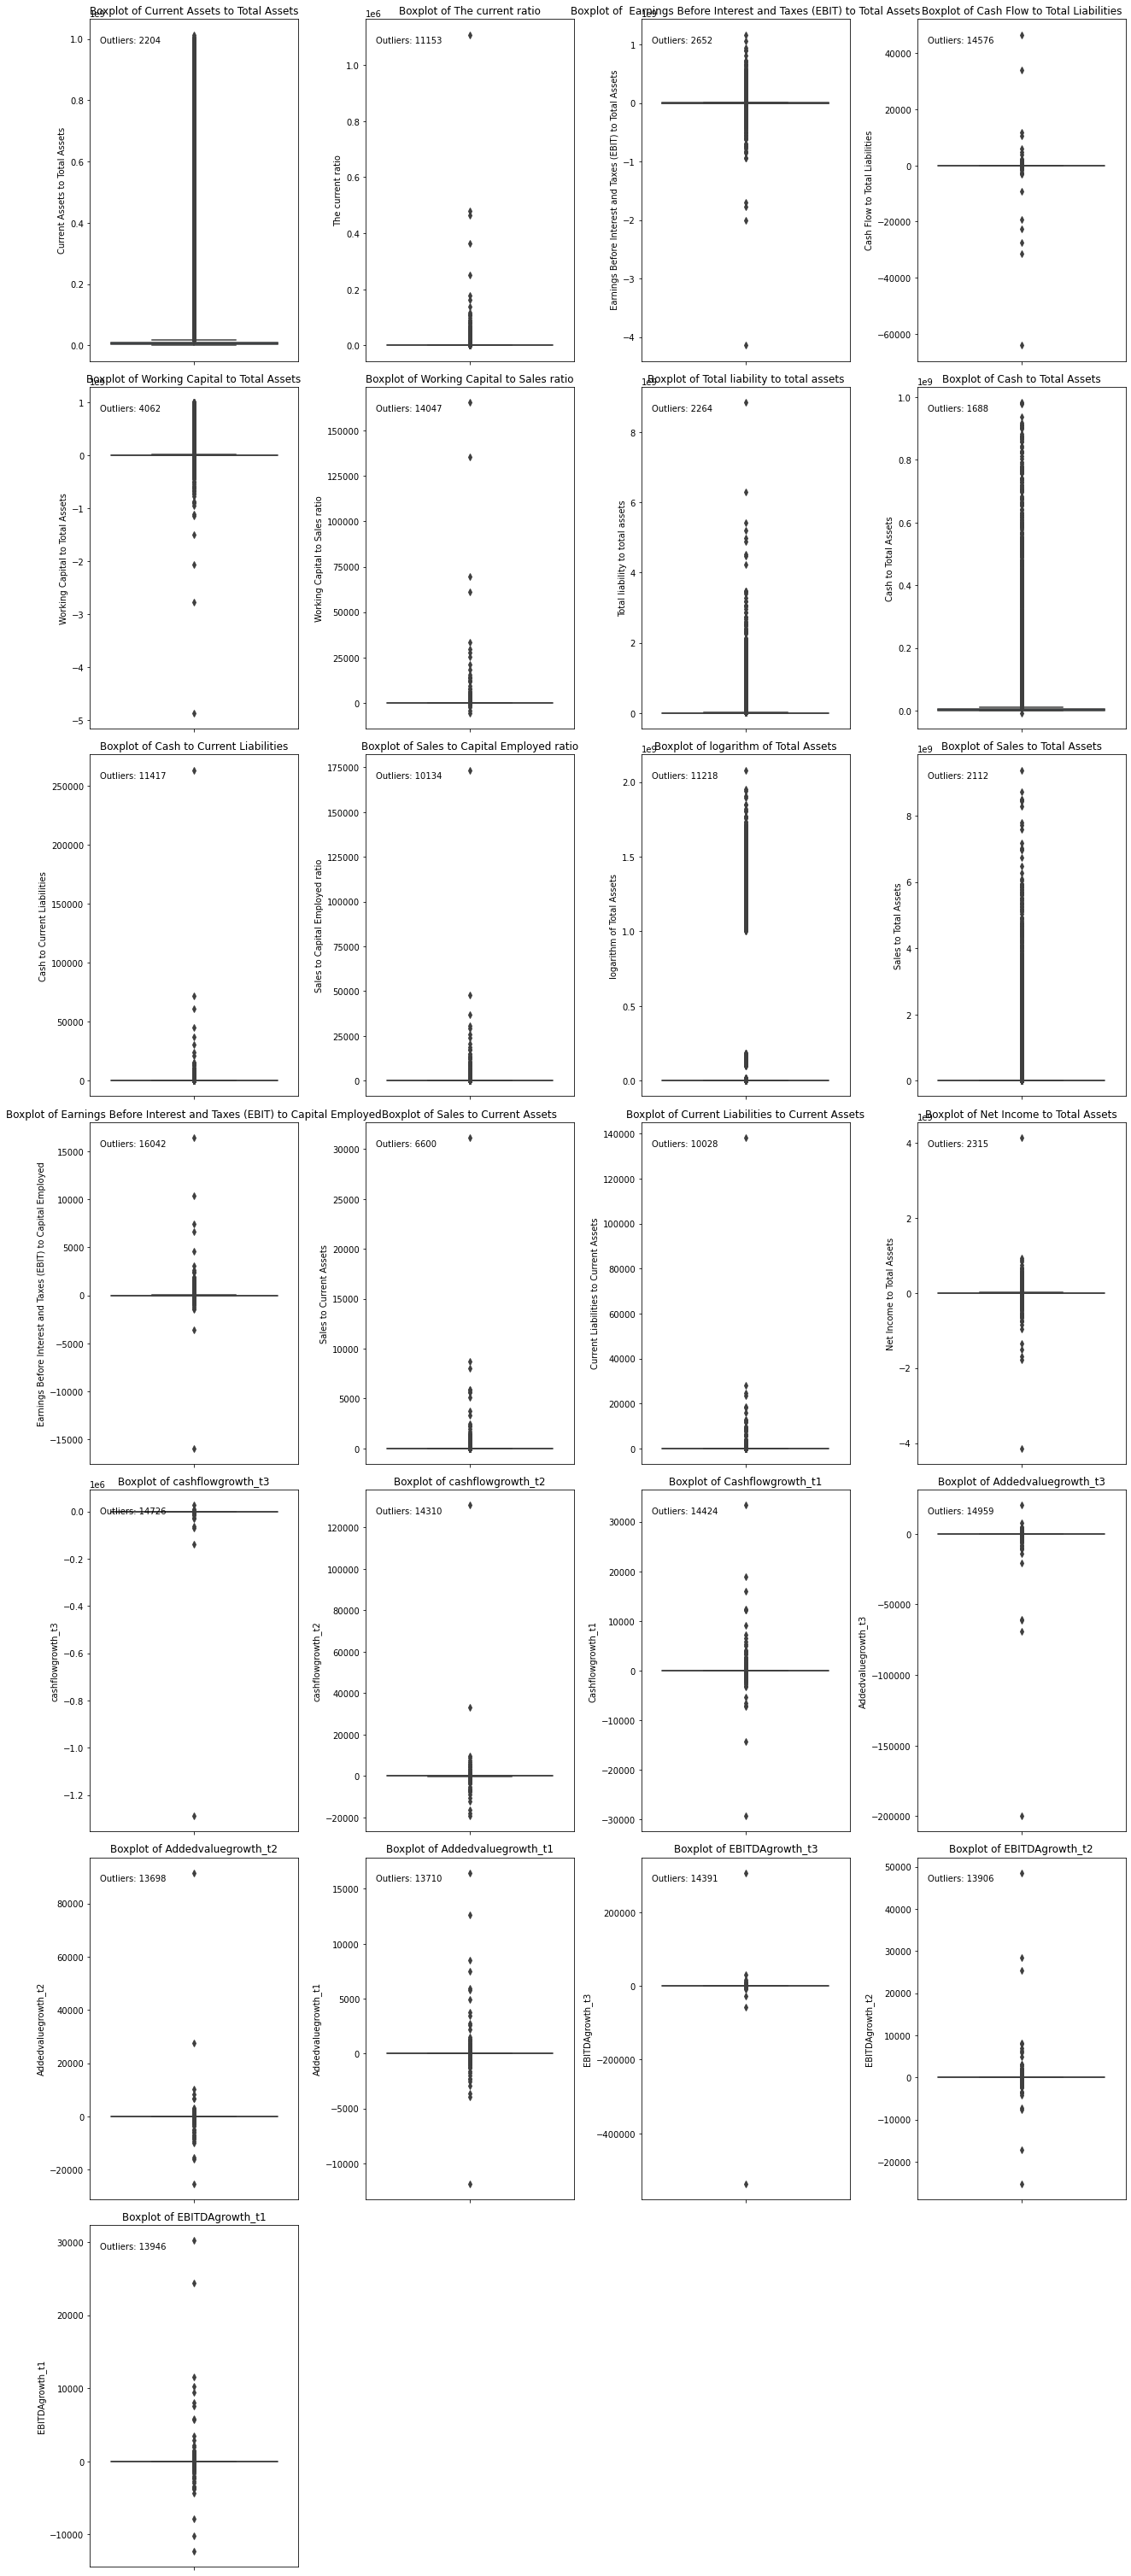

Number of outliers for Current Assets to Total Assets: 2204
Number of outliers for The current ratio: 11153
Number of outliers for  Earnings Before Interest and Taxes (EBIT) to Total Assets: 2652
Number of outliers for Cash Flow to Total Liabilities: 14576
Number of outliers for Working Capital to Total Assets: 4062
Number of outliers for Working Capital to Sales ratio: 14047
Number of outliers for Total liability to total assets: 2264
Number of outliers for Cash to Total Assets: 1688
Number of outliers for Cash to Current Liabilities: 11417
Number of outliers for Sales to Capital Employed ratio: 10134
Number of outliers for logarithm of Total Assets: 11218
Number of outliers for Sales to Total Assets: 2112
Number of outliers for Earnings Before Interest and Taxes (EBIT) to Capital Employed: 16042
Number of outliers for Sales to Current Assets: 6600
Number of outliers for Current Liabilities to Current Assets: 10028
Number of outliers for Net Income to Total Assets: 2315
Number of outl

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of rows needed for the subplots
num_rows = (len(variables) + 3) // 4

# Create a figure and subplots with appropriate shape
fig, axs = plt.subplots(num_rows, 4, figsize=(18, 6 * num_rows))

# Flatten the axs array to simplify iteration
axs = axs.flatten()

# Create a list to store the number of outliers for each variable
num_outliers = []

# Iterate over variables and create boxplots
for i, column_name in enumerate(variables):
    # Create a boxplot to visualize the distribution and identify potential outliers
    sns.boxplot(data=df_2, y=column_name, ax=axs[i])
    axs[i].set_title(f"Boxplot of {column_name}")

    # Calculate the IQR (Interquartile Range) for the column
    Q1 = df_2[column_name].quantile(0.25)
    Q3 = df_2[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers in the column
    outliers = df_2[(df_2[column_name] < lower_bound) | (df_2[column_name] > upper_bound)]
    
    # Store the number of outliers for the variable
    num_outliers.append(len(outliers))

    # Plot the number of outliers as a text annotation on the boxplot
    axs[i].text(0.05, 0.95, f"Outliers: {len(outliers)}", transform=axs[i].transAxes, verticalalignment='top')

# Hide any remaining empty subplots
for j in range(len(variables), num_rows * 4):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Print the number of outliers for each variable
for i, column_name in enumerate(variables):
    print(f"Number of outliers for {column_name}: {num_outliers[i]}")


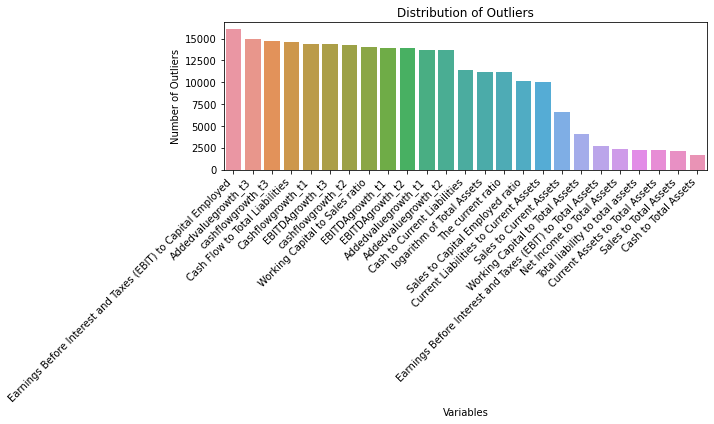

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis for the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Sort the number of outliers in descending order
sorted_num_outliers = sorted(num_outliers, reverse=True)
sorted_variables = [v for _, v in sorted(zip(num_outliers, variables), reverse=True)]

# Plot the number of outliers for each variable
sns.barplot(x=sorted_variables, y=sorted_num_outliers, ax=ax)
ax.set_xlabel("Variables")
ax.set_ylabel("Number of Outliers")
ax.set_title("Distribution of Outliers")

# Rotate x-axis tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig('outliers_number.png', bbox_inches='tight') 
plt.tight_layout()
plt.show()


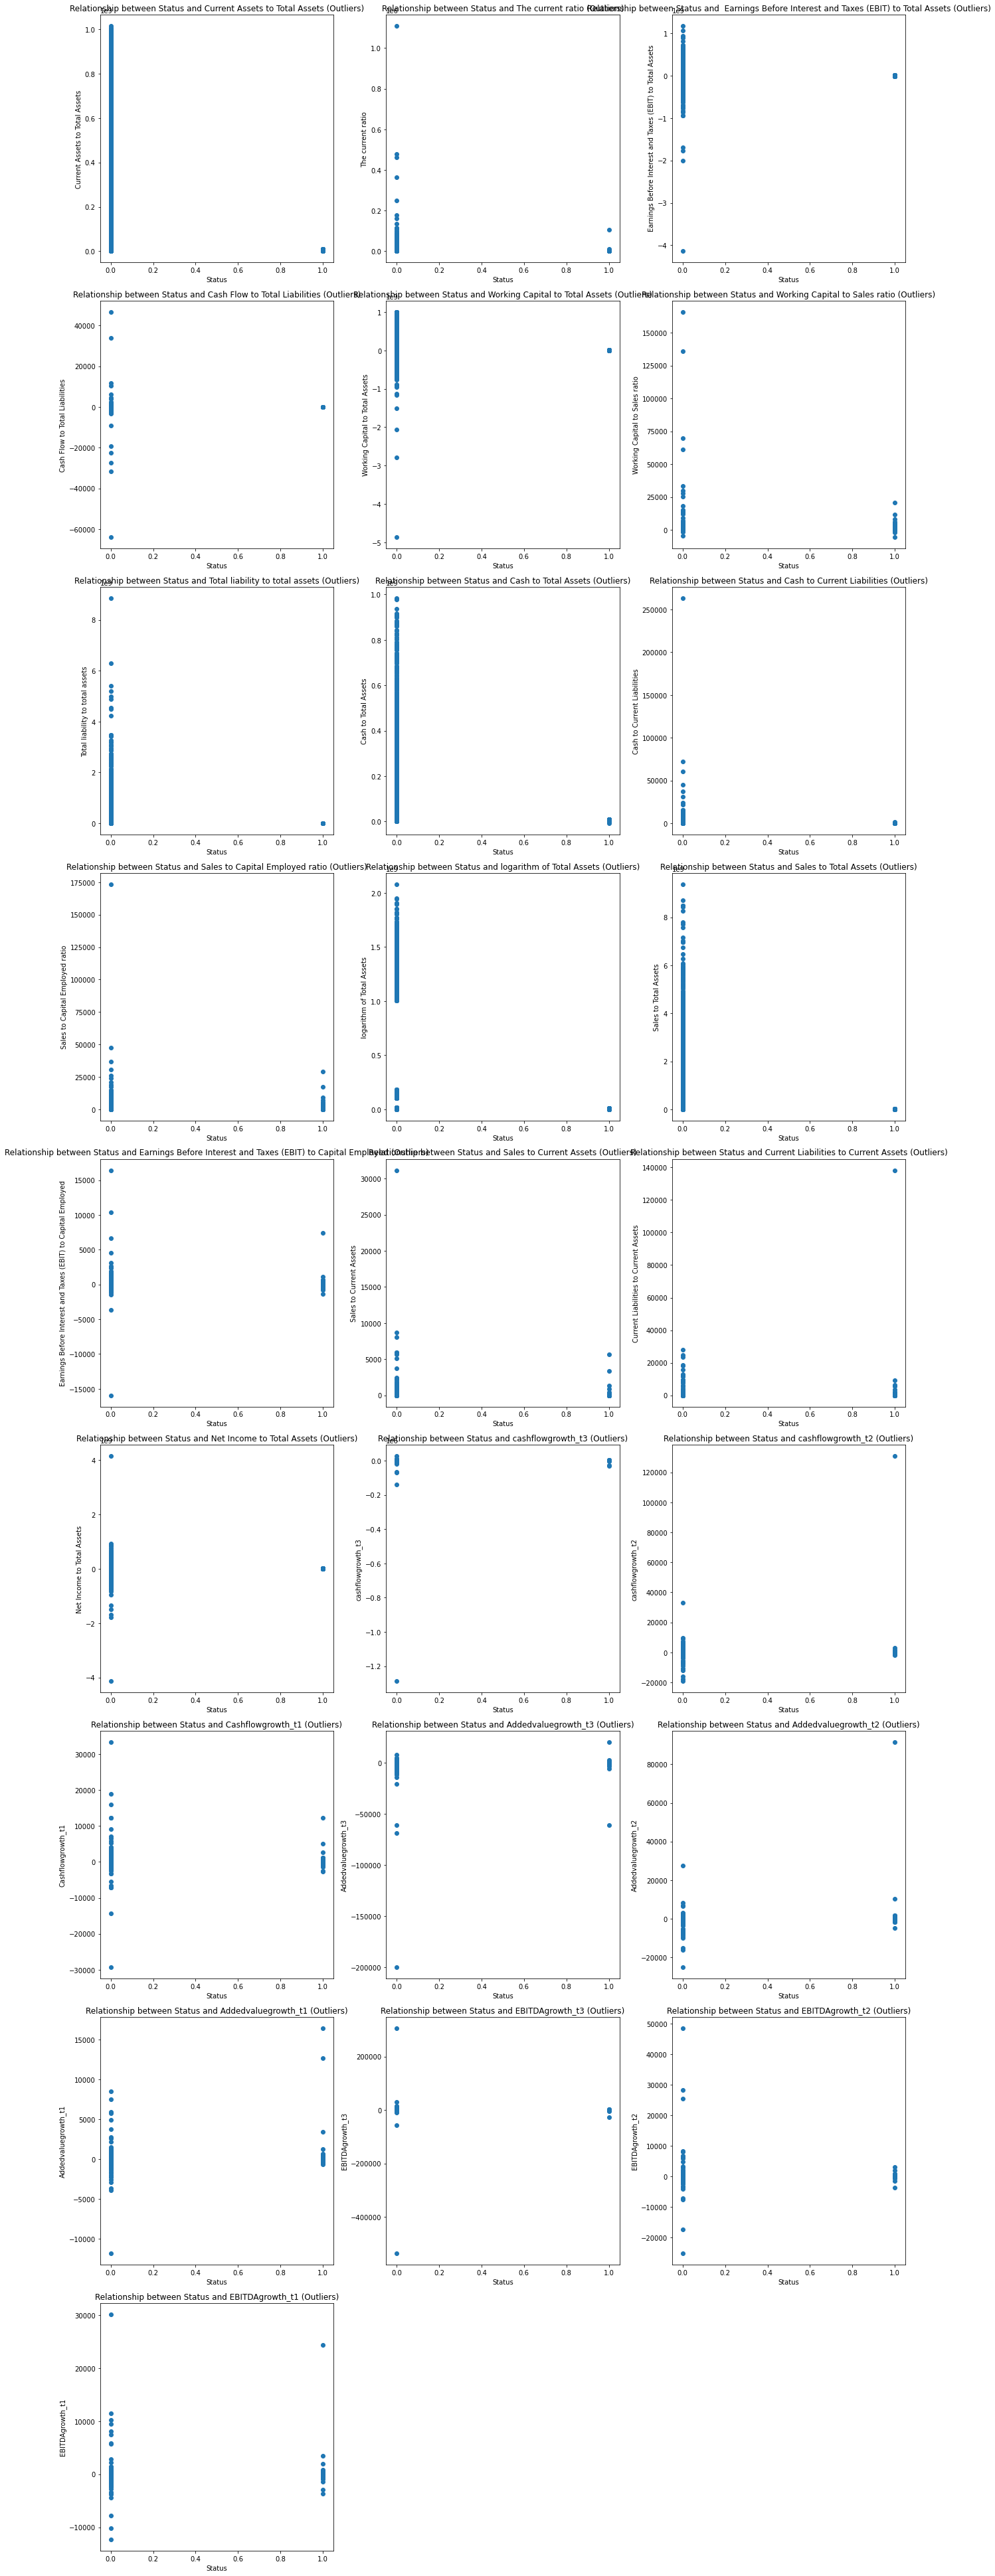

In [187]:
# Calculate the number of rows needed for the subplots
num_rows = (len(variables) + 2) // 3

# Create a figure and subplots with appropriate shape
fig, axs = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

# Flatten the axs array to simplify iteration
axs = axs.flatten()

# Iterate over variables and create scatter plots
for i, column_name in enumerate(variables):
    # Identify the outliers in the column
    outliers = df_2[(df_2[column_name] < lower_bound) | (df_2[column_name] > upper_bound)]

    # Create the scatter plot
    axs[i].scatter(outliers['status'], outliers[column_name])
    axs[i].set_xlabel("Status")
    axs[i].set_ylabel(column_name)
    axs[i].set_title(f"Relationship between Status and {column_name} (Outliers)")

# Hide empty subplots if there are any
for j in range(len(variables), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

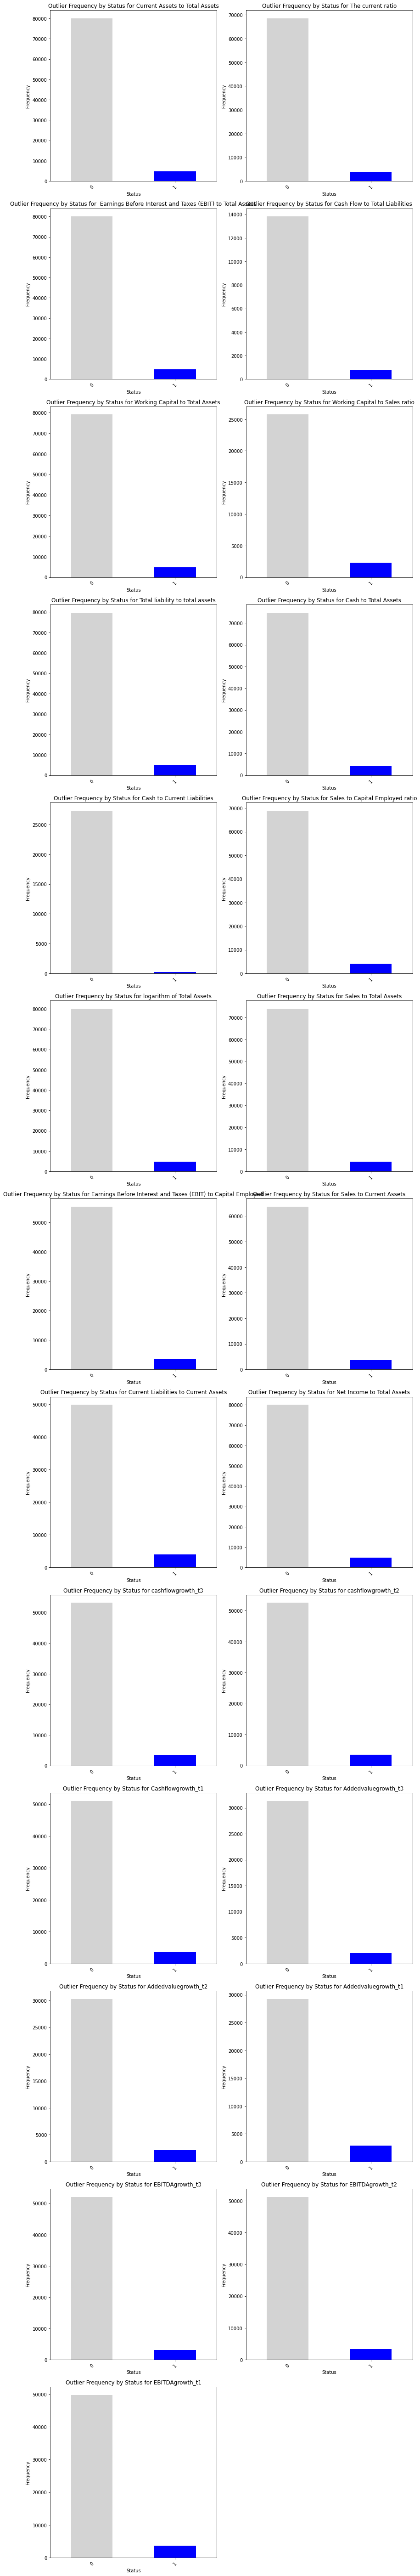

In [202]:
import matplotlib.pyplot as plt

# Calculate the number of rows needed for the subplots
num_rows = (len(variables) + 1) // 2

# Create a figure and subplots with appropriate shape
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

# Flatten the axs array to simplify iteration
axs = axs.flatten()

# Iterate over variables and create bar charts for outlier frequency
for i, column_name in enumerate(variables):
    # Identify the outliers in the column
    outliers = df_2[(df_2[column_name] < lower_bound) | (df_2[column_name] > upper_bound)]

    # Separate outliers based on status
    outliers_status_0 = outliers[outliers['status'] == 0]
    outliers_status_1 = outliers[outliers['status'] == 1]

    # Count the frequency of each status category among outliers
    outlier_counts = outliers['status'].value_counts()

    # Create the bar chart
    bar_colors = ['lightgray', 'blue']
    outlier_counts.plot(kind='bar', ax=axs[i], color=bar_colors)
    axs[i].set_xlabel("Status")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Outlier Frequency by Status for {column_name}")

    # Set x-axis tick labels to rotate for better visibility
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)

    # Color the outliers in status 1 as orange
    for rect in axs[i].patches:
        if rect.get_x() == 1.0:
            rect.set_color('orange')

# Hide empty subplots if there are any
for j in range(len(variables), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()



## Correlation check 

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


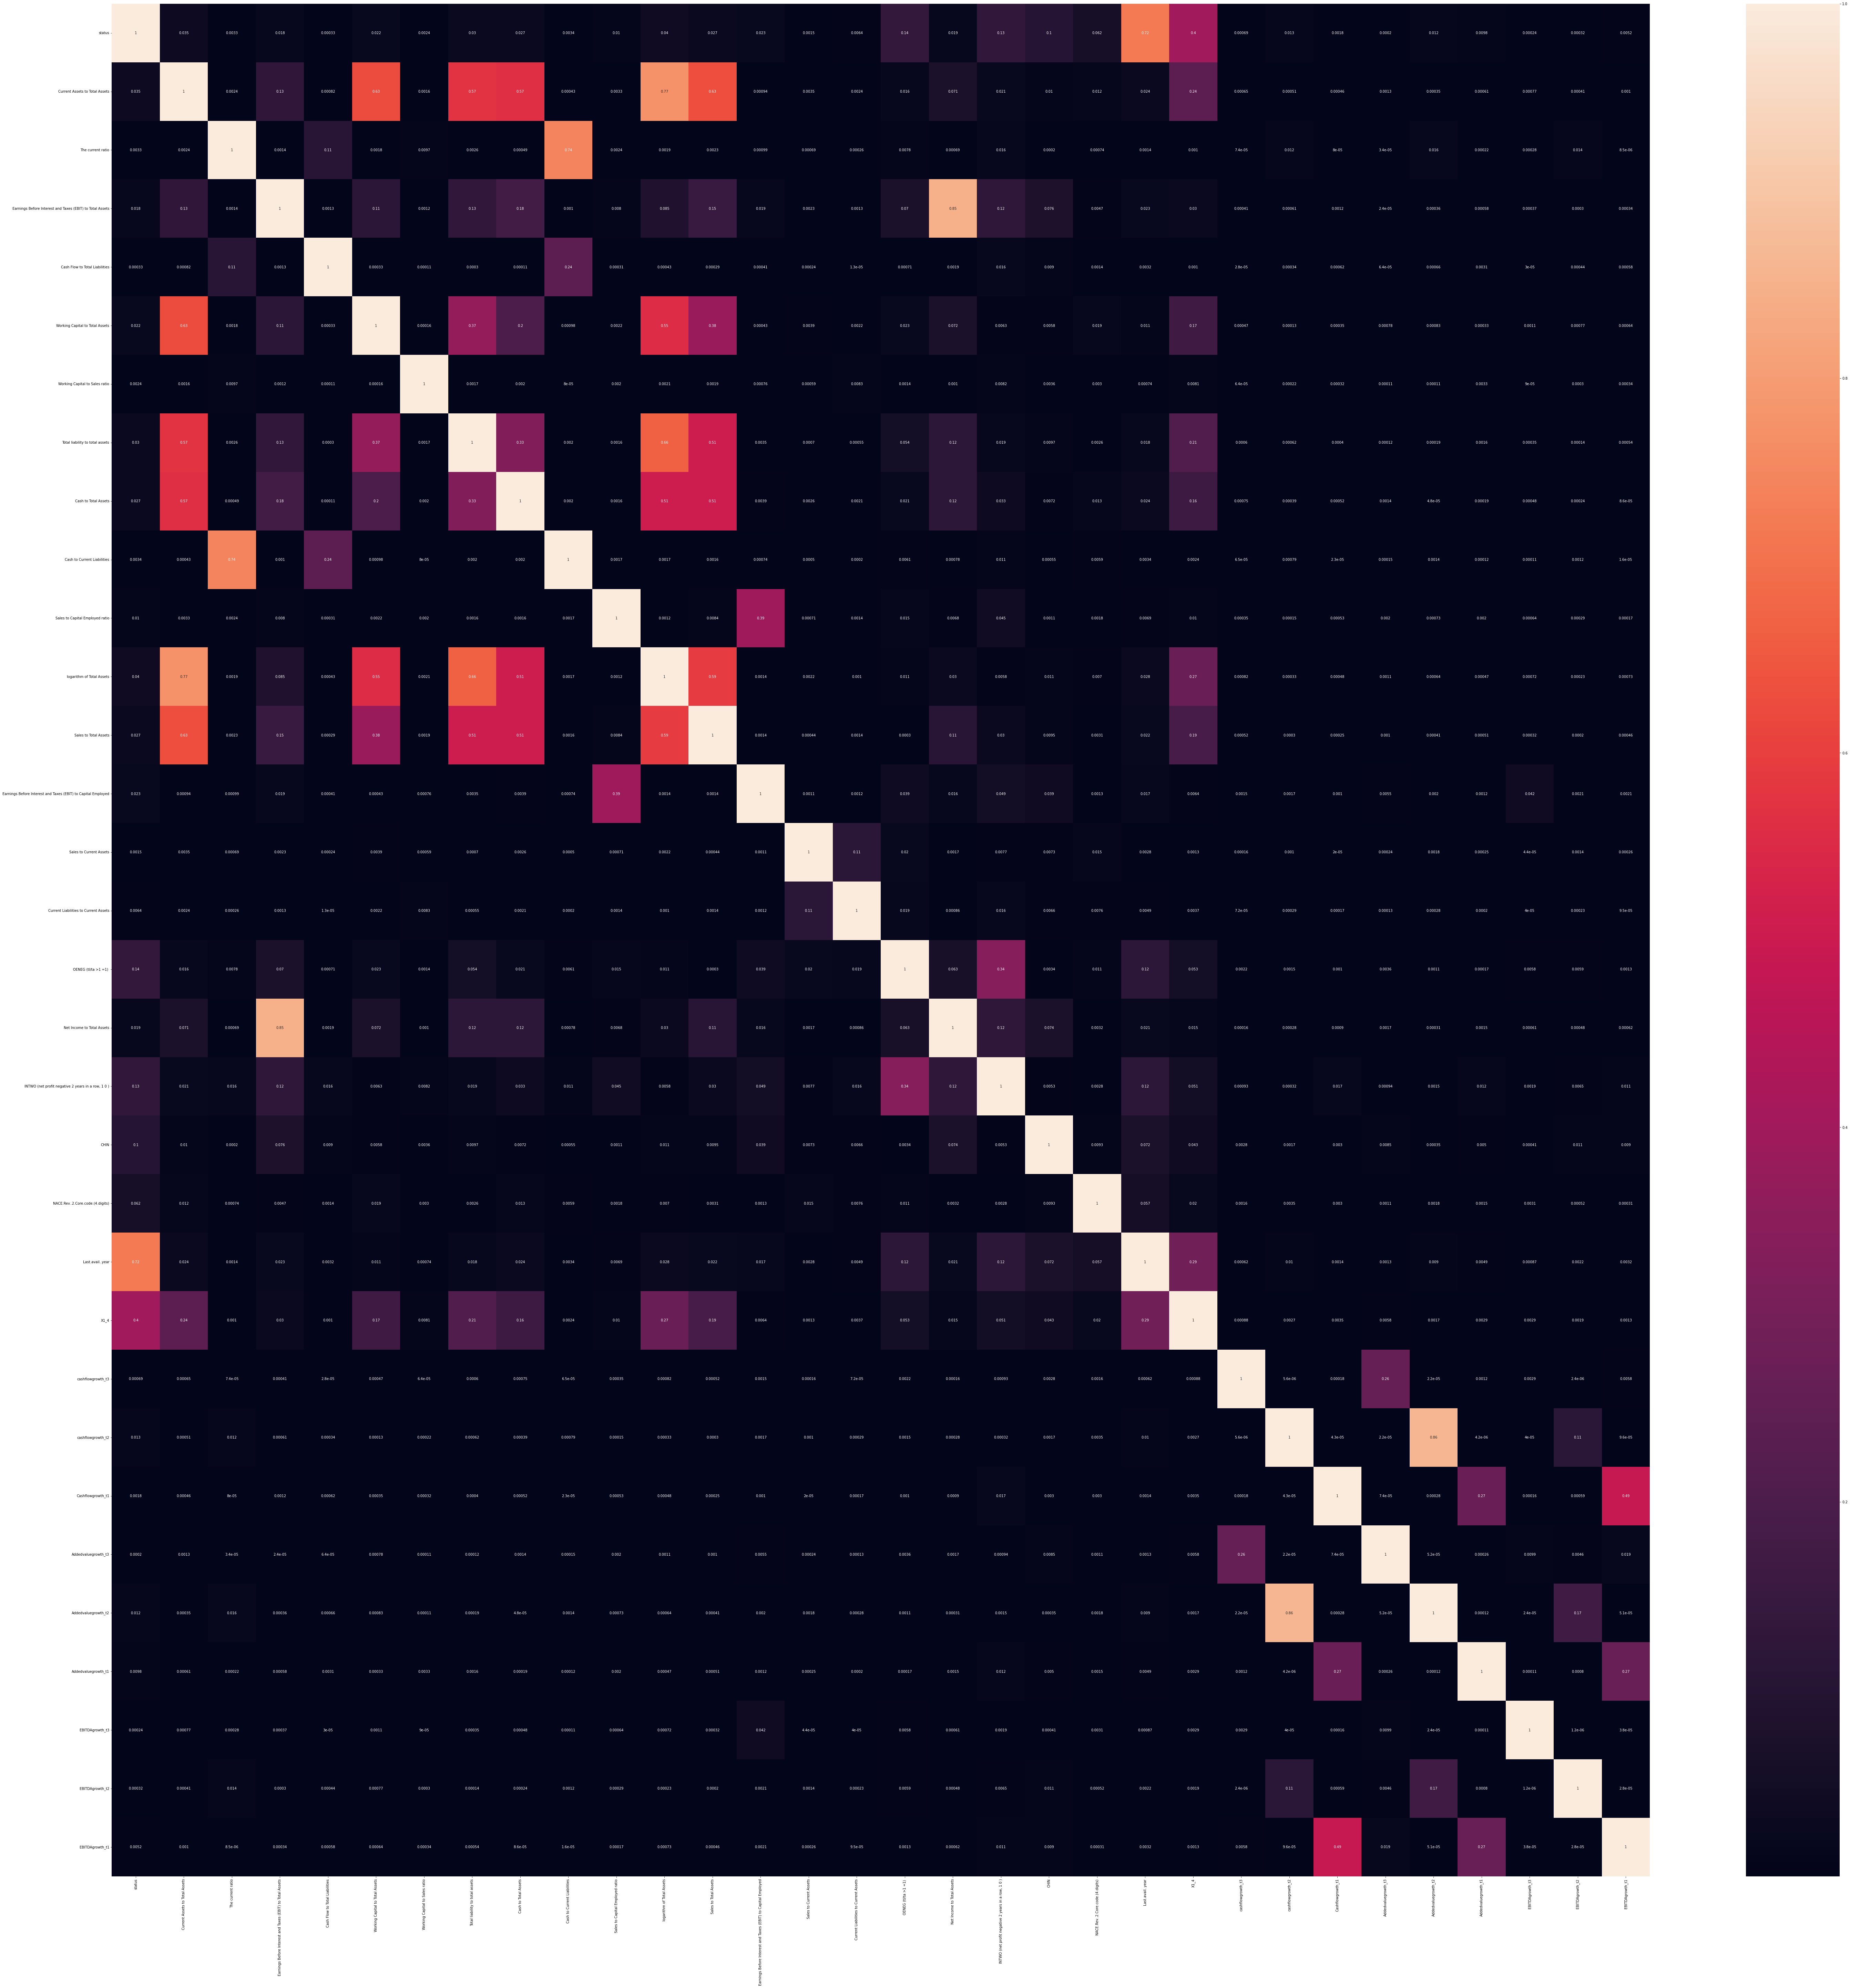

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation matrix
cor_matrix = df_2.corr().abs()

# Create upper triangular matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

# Create a figure and set the size
plt.figure(figsize=(100, 100))  # Adjust the width and height as needed

# Create the heatmap
sns.heatmap(cor_matrix, annot=True)

# Display the plot
plt.show()

As the correlation plot is too big, we want to get a smaller and more comprehensive one

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


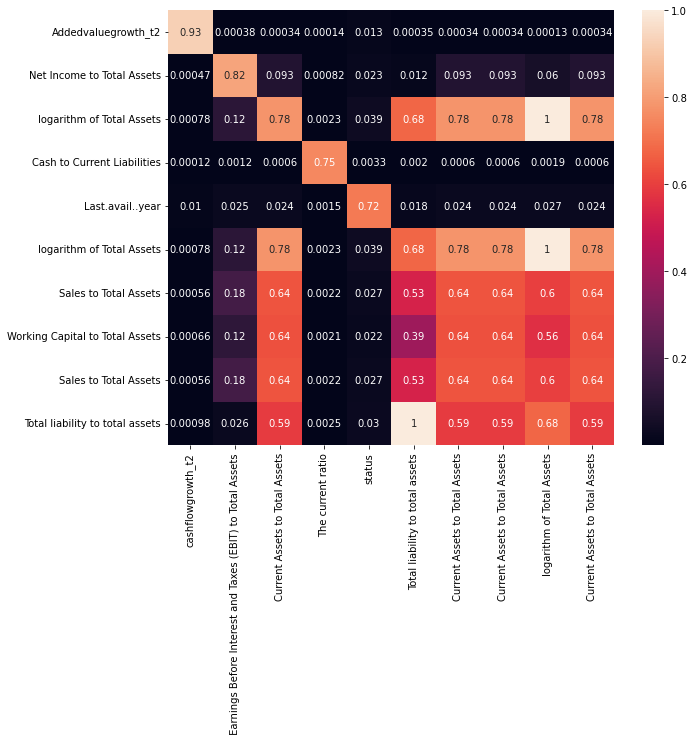

In [205]:
cor_matrix = df_2.corr().abs()

# Create upper triangular matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

# Get the top 10 highest correlations
top_corr = upper_tri.unstack().sort_values(ascending=False)[:10]

# Filter the correlation matrix to include only the top 10 correlations
top_corr_matrix = cor_matrix.loc[top_corr.index.get_level_values(0), top_corr.index.get_level_values(1)]

# Create a figure and set the size
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Create the heatmap
sns.heatmap(top_corr_matrix, annot=True)

#save the graph

plt.savefig("correlation_matrix", bbox_inches='tight')

# Display the plot
plt.show()

In [214]:
top_corr

Addedvaluegrowth_t2              cashflowgrowth_t2                                             0.926748
Net Income to Total Assets        Earnings Before Interest and Taxes (EBIT) to Total Assets    0.816593
logarithm of Total Assets        Current Assets to Total Assets                                0.779763
Cash to Current Liabilities      The current ratio                                             0.751571
Last.avail..year                 status                                                        0.722011
logarithm of Total Assets        Total liability to total assets                               0.677583
Sales to Total Assets            Current Assets to Total Assets                                0.643753
Working Capital to Total Assets  Current Assets to Total Assets                                0.636426
Sales to Total Assets            logarithm of Total Assets                                     0.599482
Total liability to total assets  Current Assets to Total Assets 

We decide to not drop anything as many variables that are correlated are due to having the same base like "total assets" or the "growth" rate are usually correlated.

In [218]:
# Get the correlation of "status" column with other columns
status_correlations = cor_matrix['status'].drop('status')

# Sort the correlations in descending order
sorted_correlations = status_correlations.sort_values(ascending=False)

# Select the top 10 correlations
top_10_correlations = sorted_correlations.head(10)

#print the top 10 correlation related to "status"
top_10_correlations

Last.avail..year                                      0.722011
X1_4                                                  0.399429
OENEG (tl/ta >1 =1)                                   0.134945
INTWO (net profit negative 2 years in a row, 1 0 )    0.131162
CHIN                                                  0.103348
NACE.Rev..2.Core.code.(4.digits)                      0.062559
logarithm of Total Assets                             0.038987
Current Assets to Total Assets                        0.034148
Total liability to total assets                       0.029737
Cash to Total Assets                                  0.027289
Name: status, dtype: float64

We decide to go further in our analysis by having the correlation related to our dependent variable "status". From what we can see here, Last.avail..year has an extremely high correlation with status. This makes perfect sense since this variable indicate the last year that we have information regarding that company. The reasons could be that the company simply no longer exist or that we did not collect further data

## Remove unrelevant columns or data leakage  

Before we trained the model we want to make sure that every columns we provided for our model are relevant and do not contain any data leakage. From the columns we see below, we suspected data leakage in growth rates. In fact, if the growth rate keeps performing bad for three consecutive years, it might indicate bankruptcy. 

In [223]:
column_names = list(df_2.columns.values)
column_names

['BvD.ID.number',
 'status',
 'Current Assets to Total Assets',
 'The current ratio',
 ' Earnings Before Interest and Taxes (EBIT) to Total Assets',
 'Cash Flow to Total Liabilities',
 'Working Capital to Total Assets',
 'Working Capital to Sales ratio',
 'Total liability to total assets',
 'Cash to Total Assets',
 'Cash to Current Liabilities',
 'Sales to Capital Employed ratio',
 'logarithm of Total Assets',
 'Sales to Total Assets',
 'Earnings Before Interest and Taxes (EBIT) to Capital Employed',
 'Sales to Current Assets',
 'Current Liabilities to Current Assets',
 'OENEG (tl/ta >1 =1) ',
 'Net Income to Total Assets',
 'INTWO (net profit negative 2 years in a row, 1 0 )',
 'CHIN',
 'NACE.Rev..2.Core.code.(4.digits)',
 'Last.avail..year',
 'X1_4',
 'cashflowgrowth_t3',
 'cashflowgrowth_t2',
 'Cashflowgrowth_t1',
 'Addedvaluegrowth_t3',
 'Addedvaluegrowth_t2',
 'Addedvaluegrowth_t1',
 'EBITDAgrowth_t3',
 'EBITDAgrowth_t2',
 'EBITDAgrowth_t1',
 'Date.of.incorporation',
 'Major.secto

In [226]:
df_3 = df_2.drop(["Region.in.country","Major.sectors","X1_4","BvD.ID.number", 
                  "Date.of.incorporation","OENEG (tl/ta >1 =1) ", 
                  "INTWO (net profit negative 2 years in a row, 1 0 )","CHIN"], axis=1)

## Divide by year

As the dataset is still large after dealing with the missing values, we decide to divide the dataset per year to get a better overview. 

In [227]:
#get the unique year sorted
unique_year = df_3["Last.avail..year"].unique()
print(sorted(unique_year))

[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


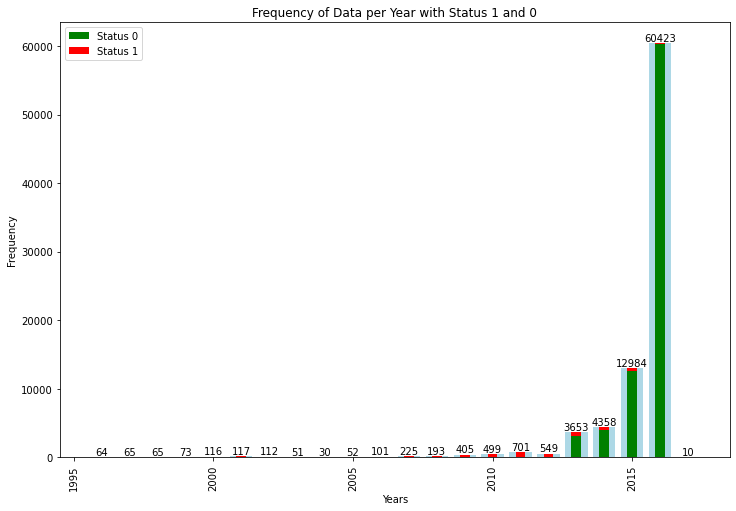

In [228]:
import matplotlib.pyplot as plt

# Grouping the DataFrame by 'Last.avail..year'
grouped_df_year = df_3.groupby('Last.avail..year')

# Calculating the count of 'Status' for each year group
status_counts_per_year = {}
for year, year_group in grouped_df_year:
    status_counts = year_group['status'].value_counts().sort_index()
    status_counts = status_counts.reindex([0, 1], fill_value=0)
    status_counts_per_year[year] = status_counts

# Plotting the frequency of years with colored bars representing status 1 and 0
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Bar plot for the frequency of years
grouped_year_df = df_3.groupby('Last.avail..year')
year_counts = grouped_year_df.size()
plt.bar(year_counts.index, year_counts.values, color='lightblue')

# Adding colored bars for status 1 and 0
bar_width = 0.35
bar_positions = year_counts.index
status_0_counts = []
status_1_counts = []

for year in bar_positions:
    status_counts = status_counts_per_year[year]
    status_0_counts.append(status_counts[0])
    status_1_counts.append(status_counts[1])

plt.bar(bar_positions, status_0_counts, label='Status 0', color='green', width=bar_width)
plt.bar(bar_positions, status_1_counts, label='Status 1', color='red', width=bar_width, bottom=status_0_counts)

# Plot configurations
plt.title('Frequency of Data per Year with Status 1 and 0')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend()

# Displaying the count values above each bar
for i, count in enumerate(year_counts.values):
    plt.text(year_counts.index[i], count, str(count), ha='center', va='bottom')

plt.savefig('frequency_year_status_plot.png')  # Save the plot as an image file
plt.show()



In [229]:
# Grouping the DataFrame by 'Last.avail..year'
grouped_df_year = df_3.groupby('Last.avail..year')

# Calculating the count of 'Status' for each year group
for year, year_group in grouped_df_year:
    status_counts = year_group['status'].value_counts().sort_index()
    status_counts = status_counts.reindex([0, 1], fill_value=0)
    print(f"Year: {year}")
    print(status_counts)
    print("\n")


Year: 1996
0     0
1    64
Name: status, dtype: int64


Year: 1997
0     0
1    65
Name: status, dtype: int64


Year: 1998
0     0
1    65
Name: status, dtype: int64


Year: 1999
0     0
1    73
Name: status, dtype: int64


Year: 2000
0      0
1    116
Name: status, dtype: int64


Year: 2001
0      0
1    117
Name: status, dtype: int64


Year: 2002
0      0
1    112
Name: status, dtype: int64


Year: 2003
0     0
1    51
Name: status, dtype: int64


Year: 2004
0     0
1    30
Name: status, dtype: int64


Year: 2005
0     0
1    52
Name: status, dtype: int64


Year: 2006
0      0
1    101
Name: status, dtype: int64


Year: 2007
0      0
1    225
Name: status, dtype: int64


Year: 2008
0      0
1    193
Name: status, dtype: int64


Year: 2009
0      0
1    405
Name: status, dtype: int64


Year: 2010
0      0
1    499
Name: status, dtype: int64


Year: 2011
0      0
1    701
Name: status, dtype: int64


Year: 2012
0      0
1    549
Name: status, dtype: int64


Year: 2013
0    3062
1     5

The data is highly unbalanced. The companies are mainly concentrated in the year of 2013-2016 with the most data in 2014, 2015 and 2016. We will thus try to perform a simple model in this year to see the result and decide on further step 

In [235]:
import pandas as pd

# Filter the dataset for the year 2014
year_2014 = df_3[df_3['Last.avail..year'] == 2014].copy()


In [236]:
year_2014 = year_2014.drop(columns = ["Last.avail..year"])
year_2014

,status,Current Assets to Total Assets,The current ratio,Earnings Before Interest and Taxes (EBIT) to Total Assets,Cash Flow to Total Liabilities,Working Capital to Total Assets,Working Capital to Sales ratio,Total liability to total assets,Cash to Total Assets,Cash to Current Liabilities,...,NACE.Rev..2.Core.code.(4.digits),cashflowgrowth_t3,cashflowgrowth_t2,Cashflowgrowth_t1,Addedvaluegrowth_t3,Addedvaluegrowth_t2,Addedvaluegrowth_t1,EBITDAgrowth_t3,EBITDAgrowth_t2,EBITDAgrowth_t1
Column1,,,,,,,,,,,,,,,,,,,,,
49,0,774660265.0,1.018034,34377869.0,0.102617,324489219.0,0.197452,760937168.0,31971616.0,0.042016,...,5630.0,-0.804113,1.625751,0.163993,-0.071129,0.176499,-0.012620,-0.784666,1.529849,0.180377
59,0,219804306.0,1.240895,21372505.0,0.001237,20818342.0,0.006849,802163718.0,189523833.0,1.069948,...,5630.0,-0.406102,-1.430535,-1.201681,-0.157135,-0.083656,-0.147664,-0.908801,0.754242,-0.052169
102,0,276752658.0,0.796173,-4183475.0,-0.045353,219547758.0,0.933258,873977129.0,9841308.0,0.028312,...,2369.0,0.045699,-0.420446,-2.521682,0.032985,0.003671,-0.912647,0.053347,-0.155930,-1.818817
108,0,31769769.0,0.105231,-500924.0,0.112641,16596148.0,1.385787,301903998.0,255325.0,0.000846,...,3511.0,-0.036061,-0.081383,-0.333889,-0.037672,-0.085201,-0.337976,-0.269452,-0.282877,-1.140401
133,0,5363123.0,3.798578,11898141.0,0.012225,340314.0,0.023934,325394566.0,31724305.0,2.246960,...,7490.0,-1.298919,-0.208196,-0.294084,0.929850,0.293752,0.013273,-1.486804,0.285275,-0.121282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105866,1,7361559.0,0.561491,-4025111.0,-0.037134,5074093.0,0.088058,1394525.0,2087744.0,0.159239,...,8121.0,-1.271412,9.779188,-0.721607,-0.228355,0.909318,-0.004078,-0.946398,-34.787130,-0.889451
105916,1,8727265.0,1.952394,4587049.0,0.012927,8246094.0,0.683079,9497315.0,4811711.0,0.107644,...,7732.0,-6.986029,-1.066108,-0.331809,-1.302271,-5.697977,0.160102,-7.185893,-1.145017,0.049113
105950,1,6103922.0,1.766649,8735154.0,0.037901,5010137.0,0.537716,8596895.0,1317026.0,0.038118,...,4322.0,-2.462460,-1.689748,-0.674071,-0.649690,1.467844,-0.372972,-1.212869,-6.085046,-0.548495


## Model Training 

We trained the model in year 2014 with the test dataset of year 2014. 

In [239]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming your dataset is in a pandas DataFrame called 'year_2014_encoded'

# Replace inf values with a large positive or negative value
year_2014 = year_2014.replace([np.inf, -np.inf], np.nan)

# Split the dataset into features (X) and target variable (y)
X = year_2014.drop(columns=['status'])
y = year_2014['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix, treating NaN and inf as missing
dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model
num_rounds = 100
model_1 = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
y_pred = model_1.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)



Accuracy: 0.9174311926605505


In [314]:

# Define the column names
columns = ['status', 'Current Assets to Total Assets', 'The current ratio',
           ' Earnings Before Interest and Taxes (EBIT) to Total Assets',
           'Cash Flow to Total Liabilities', 'Working Capital to Total Assets',
           'Working Capital to Sales ratio', 'Total liability to total assets',
           'Cash to Total Assets', 'Cash to Current Liabilities',
           'Sales to Capital Employed ratio', 'logarithm of Total Assets',
           'Sales to Total Assets', 'Earnings Before Interest and Taxes (EBIT) to Capital Employed',
           'Sales to Current Assets', 'Current Liabilities to Current Assets',
           'Net Income to Total Assets', 'NACE.Rev..2.Core.code.(4.digits)',
           'cashflowgrowth_t3', 'cashflowgrowth_t2', 'Cashflowgrowth_t1',
           'Addedvaluegrowth_t3', 'Addedvaluegrowth_t2', 'Addedvaluegrowth_t1',
           'EBITDAgrowth_t3', 'EBITDAgrowth_t2', 'EBITDAgrowth_t1']

# Create a random test DataFrame for JIT
random_data = np.random.rand(1, len(columns))
test_data = pd.DataFrame(random_data, columns=columns)
test_data['status'] = np.nan  # Fill the status column with NaN for prediction

# Print the generated test data
test_data

,status,Current Assets to Total Assets,The current ratio,Earnings Before Interest and Taxes (EBIT) to Total Assets,Cash Flow to Total Liabilities,Working Capital to Total Assets,Working Capital to Sales ratio,Total liability to total assets,Cash to Total Assets,Cash to Current Liabilities,...,NACE.Rev..2.Core.code.(4.digits),cashflowgrowth_t3,cashflowgrowth_t2,Cashflowgrowth_t1,Addedvaluegrowth_t3,Addedvaluegrowth_t2,Addedvaluegrowth_t1,EBITDAgrowth_t3,EBITDAgrowth_t2,EBITDAgrowth_t1
0,NaN,0.464643,0.175719,0.463662,0.24007,0.994577,0.794547,0.865705,0.183953,0.59071,...,0.072667,0.490794,0.305568,0.6683,0.307793,0.189281,0.362316,0.489097,0.164864,0.672221


In [315]:
# Load the model configuration from the JSON file
with open('model.json', 'r') as file:
    model_config = json.load(file)

# Create an empty XGBoost Booster
model = xgb.Booster()

# Load the model parameters into the Booster
model.load_model('model.bin')

FileNotFoundError: [Errno 2] No such file or directory: 'model.json'

In [310]:
#save the model for app 
import json

# Define the file path for saving the JSON file
json_file_path = 'model.json'

# Add the 'num_rounds' parameter to the params dictionary
params['num_rounds'] = num_rounds

# Save the model configuration to a JSON file
with open(json_file_path, 'w') as file:
    json.dump(params, file)

print("Model saved as JSON file.")



Model saved as JSON file.


### Feature importance score

Feature Importance:
                                              Feature  Importance
3                      Cash Flow to Total Liabilities    0.072561
10                          logarithm of Total Assets    0.064602
8                         Cash to Current Liabilities    0.051348
12  Earnings Before Interest and Taxes (EBIT) to C...    0.050481
24                                    EBITDAgrowth_t2    0.046375
13                            Sales to Current Assets    0.046229
14              Current Liabilities to Current Assets    0.041653
1                                   The current ratio    0.041576
25                                    EBITDAgrowth_t1    0.040512
0                      Current Assets to Total Assets    0.039869
6                     Total liability to total assets    0.038494
7                                Cash to Total Assets    0.038385
9                     Sales to Capital Employed ratio    0.037608
22                                Addedvaluegrowth_t1   

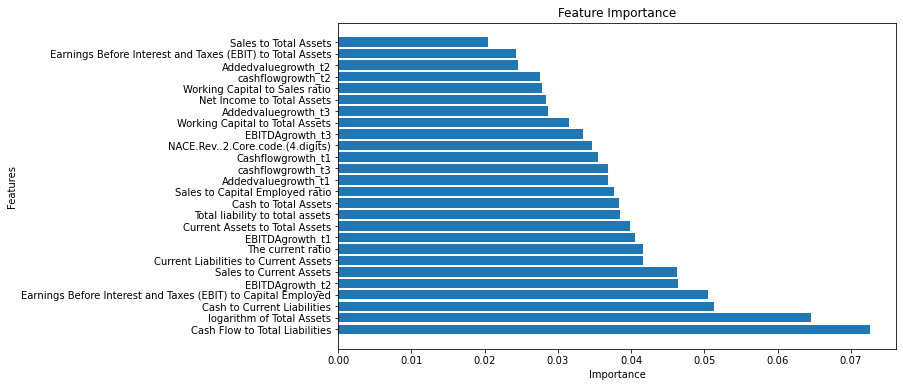

In [246]:
# Get feature importance scores
importance = model_1.feature_importances_

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

### Feature importance with F-score

<Figure size 1440x1080 with 0 Axes>

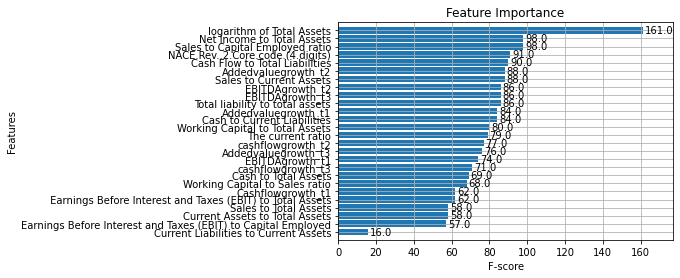

In [272]:
plt.figure(figsize=(20, 15))  # Adjust the width and height as needed
xgb.plot_importance(model_1, height=0.8, xlabel='F-score', ylabel='Features', title='Feature Importance')

plt.subplots_adjust(hspace=0.9)  # Adjust the spacing between y-axis labels

plt.show()


In [ ]:
#in case you want to use Graphiz 
#conda install python-graphviz

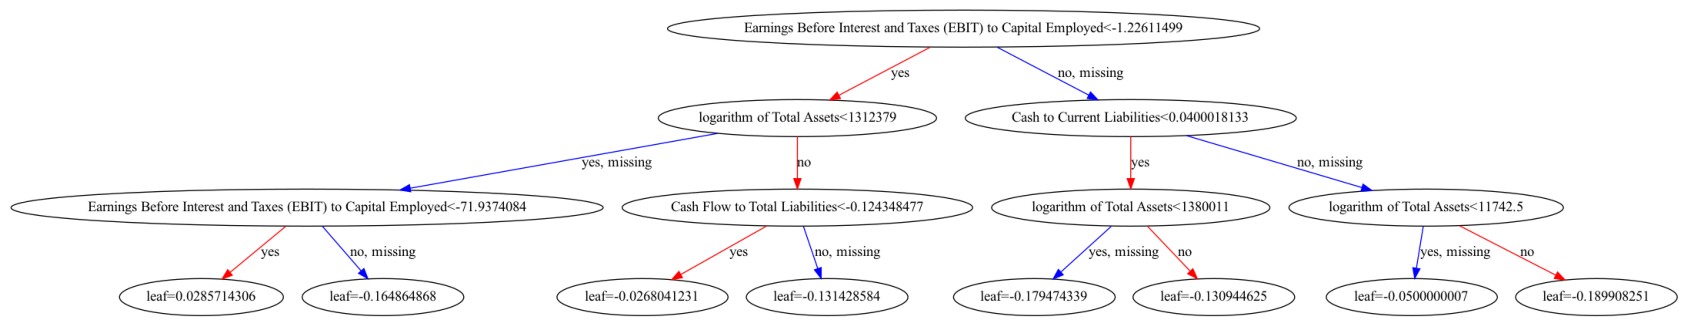

In [301]:
import graphviz

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 25))

# Plot the XGBoost tree
xgb.plot_tree(model_1, num_trees=0, ax=ax)

# Show the plot
plt.show()


In [305]:
!pip install shap

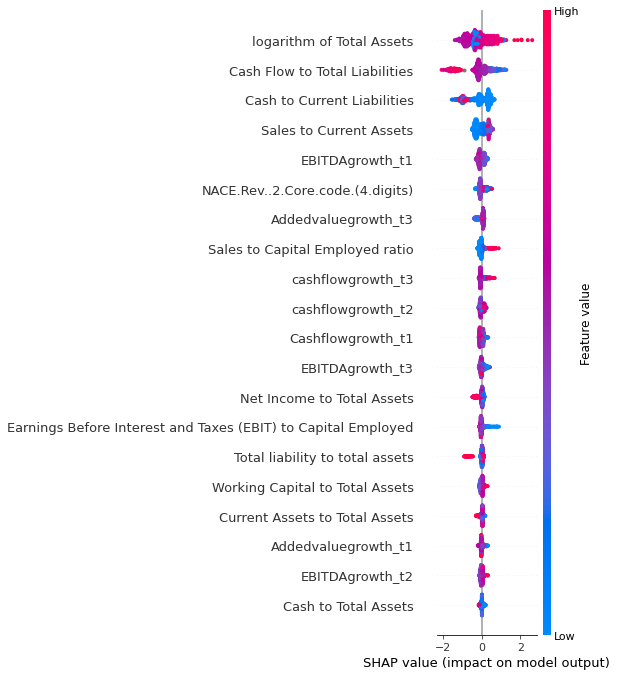

In [304]:
import shap

# Create the explainer
explainer = shap.Explainer(model_1)

# Calculate SHAP values for some instance in the data
shap_values = explainer.shap_values(X_test)

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 20))

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, show=False)

# Show the plot
plt.show()

Current Assets to Total Assets: 0.012909423559904099
The current ratio: 0.030671242624521255
 Earnings Before Interest and Taxes (EBIT) to Total Assets: -0.0025646991562098265
Cash Flow to Total Liabilities: 0.18218162655830383
Working Capital to Total Assets: 0.029181189835071564
Working Capital to Sales ratio: 0.10090798884630203
Total liability to total assets: 0.06711160391569138
Cash to Total Assets: -0.12623459100723267
Cash to Current Liabilities: 0.5323457717895508
Sales to Capital Employed ratio: -0.1902090609073639
logarithm of Total Assets: 0.8822822570800781
Sales to Total Assets: -0.008538473397493362
Earnings Before Interest and Taxes (EBIT) to Capital Employed: -0.04076626896858215
Sales to Current Assets: -0.2594187557697296
Current Liabilities to Current Assets: -0.015292732045054436
Net Income to Total Assets: 0.031156038865447044
NACE.Rev..2.Core.code.(4.digits): 0.08266643434762955
cashflowgrowth_t3: 0.06462574750185013
cashflowgrowth_t2: -0.1607445627450943
Cashflo

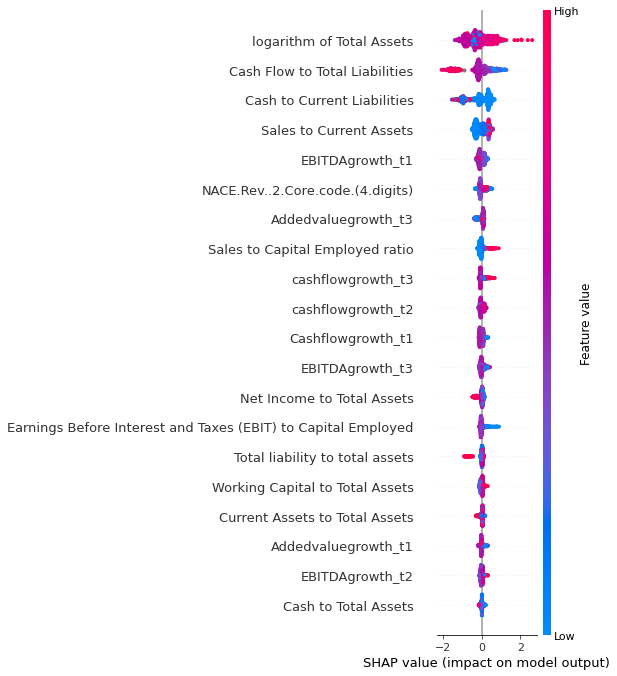

In [307]:
# Create the explainer
explainer = shap.Explainer(model_1)

# Calculate SHAP values for some instance in the data
shap_values = explainer.shap_values(X_test)

# Get the Shapley values for a specific instance (e.g., the first instance)
instance_shap_values = shap_values[0]

# Print the Shapley values for each feature
for feature, value in zip(X_test.columns, instance_shap_values):
    print(f"{feature}: {value}")

# Plot the summary plot (optional)
shap.summary_plot(shap_values, X_test, show=False)
plt.show()



#### Shapley values Interpretation 

1. 



## Test with different year

We see that the accuracy score is quite high so we decided to try with different years as the testing data


In [273]:
#we want to divide the dataset into different years
# Assuming you have a DataFrame named 'df_3' containing the data

# Create an empty dictionary to store the dataframes for each year
year_dataframes = {}

# Get the unique years present in the 'Last.avail..year' column
years = df_3['Last.avail..year'].unique()

# Iterate through each year and filter the data
for year in years:
    year_dataframes[year] = df_3[df_3['Last.avail..year'] == year].copy()

# Now, 'year_dataframes' dictionary contains dataframes for each year
# Access individual dataframes like this: year_dataframes[2014], year_dataframes[2015], etc.


In [282]:
# Create an empty dictionary to store the dataframes for each year
year_dataframes = {}

# Get the unique years present in the 'Last.avail..year' column
years = df_3['Last.avail..year'].unique()

# Iterate through each year and filter the data
for year in years:
    year_dataframes[year] = df_3[df_3['Last.avail..year'] == year].copy()
    
    # Assign the dataframe to a variable with the corresponding year in the name
    globals()[f'year_{year}'] = year_dataframes[year]
   

    

In [283]:
year_1996

,status,Current Assets to Total Assets,The current ratio,Earnings Before Interest and Taxes (EBIT) to Total Assets,Cash Flow to Total Liabilities,Working Capital to Total Assets,Working Capital to Sales ratio,Total liability to total assets,Cash to Total Assets,Cash to Current Liabilities,...,Last.avail..year,cashflowgrowth_t3,cashflowgrowth_t2,Cashflowgrowth_t1,Addedvaluegrowth_t3,Addedvaluegrowth_t2,Addedvaluegrowth_t1,EBITDAgrowth_t3,EBITDAgrowth_t2,EBITDAgrowth_t1
Column1,,,,,,,,,,,,,,,,,,,,,
100007,1,1.0,0.951741,1904977.0,-0.049634,944685.0,0.856894,1050706.0,5531884.0,0.052649,...,1996,-3.145151,-0.149252,0.200686,-0.082000,-0.012618,-0.162461,-0.546225,0.610446,-0.676794
100009,1,830472.0,1.304351,1131578.0,0.047815,830472.0,0.743114,8734188.0,0.0,0.000000,...,1996,-1.686740,-3.104834,1.443985,0.365551,0.363798,0.267359,-0.402965,2.441928,1.042892
100027,1,7029584.0,0.803146,-3866278.0,0.060423,6436404.0,0.892274,8752563.0,4788891.0,0.054714,...,1996,-1.758014,-0.523172,0.073881,0.167625,-0.174819,-0.064943,-2.388911,-0.744974,0.197691
100102,1,749966.0,3.244757,-2336372.0,-0.244880,6613322.0,1.946588,1397623.0,8863488.0,0.383482,...,1996,0.535310,-0.805140,2.870329,-0.982688,13.647470,-6.162950,0.852538,-0.898305,5.461721
100232,1,9443138.0,0.860219,-1434484.0,-0.361714,9402623.0,0.500558,1231997.0,4051494.0,0.003691,...,1996,-6.561763,-0.237247,-4.412131,0.277716,-0.237421,-0.739533,0.376618,-0.158300,-1.352499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105441,1,9026966.0,1.000738,770509.0,0.024072,8864765.0,0.298808,9063087.0,160058.0,0.017744,...,1996,4.473501,0.124762,0.440822,7.497284,1.448853,1.109029,4.795306,1.134158,1.189114
105781,1,4429333.0,0.470449,-3152527.0,-0.213986,2683524.0,0.245982,12624.0,3855472.0,0.040950,...,1996,-1.009375,50.857390,-2.881344,-0.113981,0.271082,-0.349236,0.593442,-0.622582,1.069543
105940,1,9974568.0,1.016776,-1947795.0,-0.183495,9870695.0,1.492347,1173956.0,1038729.0,0.010588,...,1996,-0.749440,-1.465781,13.022690,-0.227675,-0.195271,-0.783173,-0.472213,-0.557043,-4.800328


In [287]:
year_1996 = year_1996.drop(['Last.avail..year'], axis=1)
year_1997 = year_1997.drop(['Last.avail..year'], axis=1)
year_1998 = year_1998.drop(['Last.avail..year'], axis=1)
year_1999 = year_1999.drop(['Last.avail..year'], axis=1)
year_2000 = year_2000.drop(['Last.avail..year'], axis=1)
year_2001 = year_2001.drop(['Last.avail..year'], axis=1)
year_2002 = year_2002.drop(['Last.avail..year'], axis=1)
year_2003 = year_2003.drop(['Last.avail..year'], axis=1)
year_2004 = year_2004.drop(['Last.avail..year'], axis=1)
year_2005 = year_2005.drop(['Last.avail..year'], axis=1)
year_2006 = year_2006.drop(['Last.avail..year'], axis=1)
year_2007 = year_2007.drop(['Last.avail..year'], axis=1)
year_2008 = year_2008.drop(['Last.avail..year'], axis=1)
year_2009 = year_2009.drop(['Last.avail..year'], axis=1)
year_2010 = year_2010.drop(['Last.avail..year'], axis=1)
year_2011 = year_2011.drop(['Last.avail..year'], axis=1)
year_2012 = year_2012.drop(['Last.avail..year'], axis=1)
year_2013 = year_2013.drop(['Last.avail..year'], axis=1)
year_2014 = year_2014.drop(['Last.avail..year'], axis=1)
year_2015 = year_2015.drop(['Last.avail..year'], axis=1)
year_2016 = year_2016.drop(['Last.avail..year'], axis=1)
year_2017 = year_2017.drop(['Last.avail..year'], axis=1)

### Testing with 2016 data

In [288]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Replace inf values with a large positive or negative value
year_2014 = year_2014.replace([np.inf, -np.inf], np.nan)
year_2016 = year_2016.replace([np.inf, -np.inf], np.nan)

# Split the dataset into features (X) and target variable (y) for both years
X_2014 = year_2014.drop(columns=['status'])
y_2014 = year_2014['status']

X_2016 = year_2016.drop(columns=['status'])
y_2016 = year_2016['status']

# Split the dataset into training and testing sets for both years
X_train_2014, X_test_2016, y_train_2014, y_test_2016 = train_test_split(X_2014, y_2014, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix, treating NaN and inf as missing
dtrain_2014 = xgb.DMatrix(X_train_2014, label=y_train_2014, missing=np.nan)
dtest_2016 = xgb.DMatrix(X_test_2016, label=y_test_2016, missing=np.nan)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model on the 2014 data
num_rounds = 100
model_1 = xgb.train(params, dtrain_2014, num_rounds)

# Make predictions on the 2016 testing data
y_pred_2016 = model_1.predict(dtest_2016)
y_pred_binary_2016 = [1 if p >= 0.5 else 0 for p in y_pred_2016]

# Evaluate the accuracy of the model on the 2016 test data
accuracy_2016 = accuracy_score(y_test_2016, y_pred_binary_2016)
print("Accuracy on 2016 data:", accuracy_2016)


Accuracy on 2016 data: 0.9174311926605505


In [297]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Replace inf values with a large positive or negative value

# Split the dataset into features (X) and target variable (y) for the year 2014
X_2014 = year_2014.drop(columns=['status'])
y_2014 = year_2014['status']

# Split the dataset into training and testing sets for the year 2014
X_train_2014, X_test_2014, y_train_2014, y_test_2014 = train_test_split(X_2014, y_2014, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix, treating NaN and inf as missing
dtrain_2014 = xgb.DMatrix(X_train_2014, label=y_train_2014, missing=np.nan)
dtest_2014 = xgb.DMatrix(X_test_2014, label=y_test_2014, missing=np.nan)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model on the 2014 data
num_rounds = 100
model_2014 = xgb.train(params, dtrain_2014, num_rounds)

for year in range(1996, 2018):
    globals()[f"year_{year}"] = globals()[f"year_{year}"].replace([np.inf, -np.inf], np.nan)

    # Split the dataset into features (X) and target variable (y) for each year
    X_year = globals()[f"year_{year}"].drop(columns=['status'])
    y_year = globals()[f"year_{year}"]['status']

    # Convert the data to DMatrix, treating NaN and inf as missing
    dtest_year = xgb.DMatrix(X_year, label=y_year, missing=np.nan)

    # Make predictions on the testing data for each year using the model trained on 2014 data
    y_pred_year = model_2014.predict(dtest_year)
    y_pred_binary_year = [1 if p >= 0.5 else 0 for p in y_pred_year]

    # Evaluate the accuracy of the model on the test data
    accuracy_year = accuracy_score(y_year, y_pred_binary_year)
    print(f"Accuracy of year 2014 {year} data:", accuracy_year)


Accuracy of year 2014 1996 data: 0.046875
Accuracy of year 2014 1997 data: 0.07692307692307693
Accuracy of year 2014 1998 data: 0.03076923076923077
Accuracy of year 2014 1999 data: 0.0136986301369863
Accuracy of year 2014 2000 data: 0.06896551724137931
Accuracy of year 2014 2001 data: 0.11965811965811966
Accuracy of year 2014 2002 data: 0.10714285714285714
Accuracy of year 2014 2003 data: 0.09803921568627451
Accuracy of year 2014 2004 data: 0.0
Accuracy of year 2014 2005 data: 0.0
Accuracy of year 2014 2006 data: 0.0297029702970297
Accuracy of year 2014 2007 data: 0.03111111111111111
Accuracy of year 2014 2008 data: 0.09844559585492228
Accuracy of year 2014 2009 data: 0.07654320987654321
Accuracy of year 2014 2010 data: 0.08016032064128256
Accuracy of year 2014 2011 data: 0.08273894436519258
Accuracy of year 2014 2012 data: 0.11657559198542805
Accuracy of year 2014 2013 data: 0.8513550506433069
Accuracy of year 2014 2014 data: 0.9444699403396053
Accuracy of year 2014 2015 data: 0.96965

### Train dataset of year 2013, 2015 and 2016 

In [299]:
#year 2013 
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Replace inf values with a large positive or negative value

# Split the dataset into features (X) and target variable (y) for the year 2013
X_2013 = year_2013.drop(columns=['status'])
y_2013 = year_2013['status']

# Split the dataset into training and testing sets for the year 2013
X_train_2013, X_test_2013, y_train_2013, y_test_2013 = train_test_split(X_2013, y_2013, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix, treating NaN and inf as missing
dtrain_2013 = xgb.DMatrix(X_train_2013, label=y_train_2013, missing=np.nan)
dtest_2013 = xgb.DMatrix(X_test_2013, label=y_test_2013, missing=np.nan)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model on the 2013 data
num_rounds = 100
model_2013 = xgb.train(params, dtrain_2013, num_rounds)

for year in range(1996, 2018):
    globals()[f"year_{year}"] = globals()[f"year_{year}"].replace([np.inf, -np.inf], np.nan)

    # Split the dataset into features (X) and target variable (y) for each year
    X_year = globals()[f"year_{year}"].drop(columns=['status'])
    y_year = globals()[f"year_{year}"]['status']

    # Convert the data to DMatrix, treating NaN and inf as missing
    dtest_year = xgb.DMatrix(X_year, label=y_year, missing=np.nan)

    # Make predictions on the testing data for each year using the model trained on 2013 data
    y_pred_year = model_2013.predict(dtest_year)
    y_pred_binary_year = [1 if p >= 0.5 else 0 for p in y_pred_year]

    # Evaluate the accuracy of the model on the test data
    accuracy_year = accuracy_score(y_year, y_pred_binary_year)
    print(f"Accuracy of year 2013 on {year} data:", accuracy_year)


Accuracy of year 2013 on 1996 data: 0.1875
Accuracy of year 2013 on 1997 data: 0.2153846153846154
Accuracy of year 2013 on 1998 data: 0.2
Accuracy of year 2013 on 1999 data: 0.1917808219178082
Accuracy of year 2013 on 2000 data: 0.20689655172413793
Accuracy of year 2013 on 2001 data: 0.21367521367521367
Accuracy of year 2013 on 2002 data: 0.125
Accuracy of year 2013 on 2003 data: 0.3137254901960784
Accuracy of year 2013 on 2004 data: 0.1
Accuracy of year 2013 on 2005 data: 0.17307692307692307
Accuracy of year 2013 on 2006 data: 0.19801980198019803
Accuracy of year 2013 on 2007 data: 0.2222222222222222
Accuracy of year 2013 on 2008 data: 0.35233160621761656
Accuracy of year 2013 on 2009 data: 0.3506172839506173
Accuracy of year 2013 on 2010 data: 0.3286573146292585
Accuracy of year 2013 on 2011 data: 0.3252496433666191
Accuracy of year 2013 on 2012 data: 0.3588342440801457
Accuracy of year 2013 on 2013 data: 0.9009033670955379
Accuracy of year 2013 on 2014 data: 0.9263423588802203
Accur

In [291]:
#Data of year 2015 
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Replace inf values with a large positive or negative value

# Split the dataset into features (X) and target variable (y) for the year 2015
X_2015 = year_2015.drop(columns=['status'])
y_2015 = year_2015['status']

# Split the dataset into training and testing sets for the year 2015
X_train_2015, X_test_2015, y_train_2015, y_test_2015 = train_test_split(X_2015, y_2015, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix, treating NaN and inf as missing
dtrain_2015 = xgb.DMatrix(X_train_2015, label=y_train_2015, missing=np.nan)
dtest_2015 = xgb.DMatrix(X_test_2015, label=y_test_2015, missing=np.nan)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model on the 2015 data
num_rounds = 100
model_2015 = xgb.train(params, dtrain_2015, num_rounds)

for year in range(1996, 2018):
    globals()[f"year_{year}"] = globals()[f"year_{year}"].replace([np.inf, -np.inf], np.nan)

    # Split the dataset into features (X) and target variable (y) for each year
    X_year = globals()[f"year_{year}"].drop(columns=['status'])
    y_year = globals()[f"year_{year}"]['status']

    # Convert the data to DMatrix, treating NaN and inf as missing
    dtest_year = xgb.DMatrix(X_year, label=y_year, missing=np.nan)

    # Make predictions on the testing data for each year
    y_pred_year = model_2015.predict(dtest_year)
    y_pred_binary_year = [1 if p >= 0.5 else 0 for p in y_pred_year]

    # Evaluate the accuracy of the model on the test data for each year
    accuracy_year = accuracy_score(y_year, y_pred_binary_year)
    print(f"Accuracy of training model of year 2015 on {year} data:", accuracy_year)


Accuracy of training model of year 2015 on 1996 data: 0.015625
Accuracy of training model of year 2015 on 1997 data: 0.046153846153846156
Accuracy of training model of year 2015 on 1998 data: 0.06153846153846154
Accuracy of training model of year 2015 on 1999 data: 0.0136986301369863
Accuracy of training model of year 2015 on 2000 data: 0.0603448275862069
Accuracy of training model of year 2015 on 2001 data: 0.06837606837606838
Accuracy of training model of year 2015 on 2002 data: 0.026785714285714284
Accuracy of training model of year 2015 on 2003 data: 0.058823529411764705
Accuracy of training model of year 2015 on 2004 data: 0.03333333333333333
Accuracy of training model of year 2015 on 2005 data: 0.0
Accuracy of training model of year 2015 on 2006 data: 0.0
Accuracy of training model of year 2015 on 2007 data: 0.017777777777777778
Accuracy of training model of year 2015 on 2008 data: 0.06217616580310881
Accuracy of training model of year 2015 on 2009 data: 0.05925925925925926
Accur

In [300]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Replace inf values with a large positive or negative value

# Split the dataset into features (X) and target variable (y) for the year 2016
X_2016 = year_2016.drop(columns=['status'])
y_2016 = year_2016['status']

# Split the dataset into training and testing sets for the year 2016
X_train_2016, X_test_2016, y_train_2016, y_test_2016 = train_test_split(X_2016, y_2016, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix, treating NaN and inf as missing
dtrain_2016 = xgb.DMatrix(X_train_2016, label=y_train_2016, missing=np.nan)
dtest_2016 = xgb.DMatrix(X_test_2016, label=y_test_2016, missing=np.nan)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model on the 2016 data
num_rounds = 100
model_2016 = xgb.train(params, dtrain_2016, num_rounds)

for year in range(1996, 2018):
    globals()[f"year_{year}"] = globals()[f"year_{year}"].replace([np.inf, -np.inf], np.nan)

    # Split the dataset into features (X) and target variable (y) for each year
    X_year = globals()[f"year_{year}"].drop(columns=['status'])
    y_year = globals()[f"year_{year}"]['status']

    # Convert the data to DMatrix, treating NaN and inf as missing
    dtest_year = xgb.DMatrix(X_year, label=y_year, missing=np.nan)

    # Make predictions on the testing data for each year using the model trained on 2016 data
    y_pred_year = model_2016.predict(dtest_year)
    y_pred_binary_year = [1 if p >= 0.5 else 0 for p in y_pred_year]

    # Evaluate the accuracy of the model on the test data
    accuracy_year = accuracy_score(y_year, y_pred_binary_year)
    print(f"Accuracy of year 2016 on {year} data:", accuracy_year)


Accuracy of year 2016 on 1996 data: 0.0
Accuracy of year 2016 on 1997 data: 0.0
Accuracy of year 2016 on 1998 data: 0.0
Accuracy of year 2016 on 1999 data: 0.0
Accuracy of year 2016 on 2000 data: 0.0
Accuracy of year 2016 on 2001 data: 0.0
Accuracy of year 2016 on 2002 data: 0.0
Accuracy of year 2016 on 2003 data: 0.0
Accuracy of year 2016 on 2004 data: 0.0
Accuracy of year 2016 on 2005 data: 0.0
Accuracy of year 2016 on 2006 data: 0.0
Accuracy of year 2016 on 2007 data: 0.0
Accuracy of year 2016 on 2008 data: 0.0
Accuracy of year 2016 on 2009 data: 0.0
Accuracy of year 2016 on 2010 data: 0.0
Accuracy of year 2016 on 2011 data: 0.0
Accuracy of year 2016 on 2012 data: 0.00546448087431694
Accuracy of year 2016 on 2013 data: 0.8382151656173008
Accuracy of year 2016 on 2014 data: 0.9295548416704911
Accuracy of year 2016 on 2015 data: 0.9700400492914356
Accuracy of year 2016 on 2016 data: 0.9986594508713569
Accuracy of year 2016 on 2017 data: 1.0


### Balance dataset 

We have an unbalance dataset, thus we will try resampling to see if there is any change in our model

In [51]:
from imblearn.over_sampling import RandomOverSampler

# Separate the features and target variables
X = df_2.drop('status', axis=1)
y = df_2['status']

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = X_resampled.copy()
df_resampled['status'] = y_resampled

# Group the resampled DataFrame by 'Last.avail..year'
grouped_df_year = df_resampled.groupby('Last.avail..year')

# Calculate the count of 'Status' for each year group
for year, year_group in grouped_df_year:
    status_counts = year_group['status'].value_counts().sort_index()
    status_counts = status_counts.reindex([0, 1], fill_value=0)
    print(f"Year: {year}")
    print(status_counts)
    print("\n")


Year: 1996
0       0
1    1313
Name: status, dtype: int64


Year: 1997
0       0
1    1303
Name: status, dtype: int64


Year: 1998
0       0
1    1381
Name: status, dtype: int64


Year: 1999
0       0
1    1335
Name: status, dtype: int64


Year: 2000
0       0
1    2100
Name: status, dtype: int64


Year: 2001
0       0
1    2196
Name: status, dtype: int64


Year: 2002
0       0
1    2071
Name: status, dtype: int64


Year: 2003
0      0
1    965
Name: status, dtype: int64


Year: 2004
0      0
1    518
Name: status, dtype: int64


Year: 2005
0      0
1    948
Name: status, dtype: int64


Year: 2006
0       0
1    1882
Name: status, dtype: int64


Year: 2007
0       0
1    3994
Name: status, dtype: int64


Year: 2008
0       0
1    3454
Name: status, dtype: int64


Year: 2009
0       0
1    6925
Name: status, dtype: int64


Year: 2010
0       0
1    8680
Name: status, dtype: int64


Year: 2011
0        0
1    12053
Name: status, dtype: int64


Year: 2012
0       0
1    9609
Name: status,

In [53]:
year_2014_balance = df_2[df_2['Last.avail..year'] == 2014].copy()
year_2014_balance 

,BvD.ID.number,status,Current Assets to Total Assets,The current ratio,Earnings Before Interest and Taxes (EBIT) to Total Assets,Cash Flow to Total Liabilities,Working Capital to Total Assets,Working Capital to Sales ratio,Total liability to total assets,Cash to Total Assets,...,Cashflowgrowth_t1,Addedvaluegrowth_t3,Addedvaluegrowth_t2,Addedvaluegrowth_t1,EBITDAgrowth_t3,EBITDAgrowth_t2,EBITDAgrowth_t1,Date.of.incorporation,Major.sectors,Region.in.country
Column1,,,,,,,,,,,,,,,,,,,,,
26,ESB84477330,0,1.0,1167.238806,-125656927.0,-144.716418,0.0,NaN,856723.0,1598363.0,...,-571.352941,-0.911466,-0.961808,72.725191,-0.911541,-0.961808,72.725191,11/10/2005,Other services,Madrid
49,ESB85894533,0,774660265.0,1.018034,34377869.0,0.102617,324489219.0,0.197452,760937168.0,31971616.0,...,0.163993,-0.071129,0.176499,-0.012620,-0.784666,1.529849,0.180377,10/02/2010,Hotels & restaurants,Madrid
59,ESB73381329,0,219804306.0,1.240895,21372505.0,0.001237,20818342.0,0.006849,802163718.0,189523833.0,...,-1.201681,-0.157135,-0.083656,-0.147664,-0.908801,0.754242,-0.052169,15/06/2005,Hotels & restaurants,Murcia
102,ESB85649093,0,276752658.0,0.796173,-4183475.0,-0.045353,219547758.0,0.933258,873977129.0,9841308.0,...,-2.521682,0.032985,0.003671,-0.912647,0.053347,-0.155930,-1.818817,06/03/2009,"Chemicals, rubber, plastics, non-metallic prod...",Madrid
108,ESB50851450,0,31769769.0,0.105231,-500924.0,0.112641,16596148.0,1.385787,301903998.0,255325.0,...,-0.333889,-0.037672,-0.085201,-0.337976,-0.269452,-0.282877,-1.140401,06/07/2000,"Gas, Water, Electricity",Aragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105866,ESB96367107,1,7361559.0,0.561491,-4025111.0,-0.037134,5074093.0,0.088058,1394525.0,2087744.0,...,-0.721607,-0.228355,0.909318,-0.004078,-0.946398,-34.787130,-0.889451,30/12/1993,Other services,Comunidad Valenciana
105916,ESB95449583,1,8727265.0,1.952394,4587049.0,0.012927,8246094.0,0.683079,9497315.0,4811711.0,...,-0.331809,-1.302271,-5.697977,0.160102,-7.185893,-1.145017,0.049113,18/11/2005,Other services,Pais Vasco
105950,ESB18445148,1,6103922.0,1.766649,8735154.0,0.037901,5010137.0,0.537716,8596895.0,1317026.0,...,-0.674071,-0.649690,1.467844,-0.372972,-1.212869,-6.085046,-0.548495,09/04/1996,Construction,Andalucia


In [56]:
year_2014_balance = year_2014_balance.drop(["Region.in.country","Major.sectors","X1_4","BvD.ID.number", 
                                "Date.of.incorporation","OENEG (tl/ta >1 =1) ", 
                                "INTWO (net profit negative 2 years in a row, 1 0 )","CHIN","Last.avail..year",
                                "cashflowgrowth_t3", "cashflowgrowth_t2", "Cashflowgrowth_t1",
                               "Addedvaluegrowth_t3", "Addedvaluegrowth_t2", "Addedvaluegrowth_t1",
                               "Addedvaluegrowth_t1", "EBITDAgrowth_t2", "EBITDAgrowth_t1"], axis=1)

In [57]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming your dataset is in a pandas DataFrame called 'year_2014_encoded'

# Replace inf values with a large positive or negative value
year_2014_balance = year_2014_balance.replace([np.inf, -np.inf], np.nan)

# Split the dataset into features (X) and target variable (y)
X = year_2014_balance.drop(columns=['status'])
y = year_2014_balance['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix, treating NaN and inf as missing
dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)



Accuracy: 0.9300411522633745


## Appendix Try out

In order for the encoding to work well, the dataset should not contain missing data. We decide to drop the two missing value in "Region.in.country"

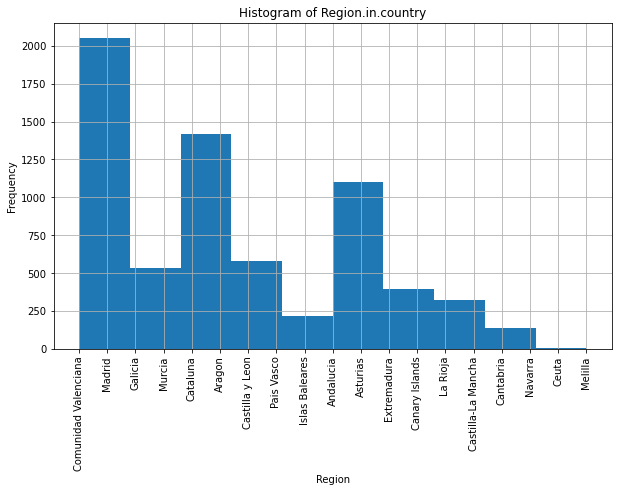

In [35]:
plt.figure(figsize=(10, 6))

# Plot histogram of the 'Region.in.country' column
year_2014['Region.in.country'].hist()

# Set plot title and labels
plt.title('Histogram of Region.in.country')
plt.xlabel('Region')
plt.ylabel('Frequency')

# Rotate tick labels for better visibility
plt.xticks(rotation=90)

# Show the histogram
plt.show()

In [36]:
#drop the 2 rows containing the missing values in region 
year_2014.dropna(subset=['Region.in.country'], inplace=True)

In [37]:
year_2014_encoded = pd.get_dummies(year_2014, columns=['Major.sectors', 'Region.in.country'])

In [38]:
#check that the encoding has worked well 
year_2014_encoded

,BvD.ID.number,status,Current Assets to Total Assets,The current ratio,Earnings Before Interest and Taxes (EBIT) to Total Assets,Cash Flow to Total Liabilities,Working Capital to Total Assets,Working Capital to Sales ratio,Total liability to total assets,Cash to Total Assets,...,Region.in.country_Comunidad Valenciana,Region.in.country_Extremadura,Region.in.country_Galicia,Region.in.country_Islas Baleares,Region.in.country_La Rioja,Region.in.country_Madrid,Region.in.country_Melilla,Region.in.country_Murcia,Region.in.country_Navarra,Region.in.country_Pais Vasco
Column1,,,,,,,,,,,,,,,,,,,,,
10,ESB98455140,0,994519823.0,3.065573,539702937.0,1.247712,104906243.0,0.124950,324415673.0,63621884.0,...,1,0,0,0,0,0,0,0,0,0
26,ESB84477330,0,1.0,1167.238806,-125656927.0,-144.716418,0.0,NaN,856723.0,1598363.0,...,0,0,0,0,0,1,0,0,0,0
47,ESF36437820,0,218543271.0,2.072344,11457861.0,1.609281,130754418.0,0.141193,105457068.0,59682261.0,...,0,0,1,0,0,0,0,0,0,0
49,ESB85894533,0,774660265.0,1.018034,34377869.0,0.102617,324489219.0,0.197452,760937168.0,31971616.0,...,0,0,0,0,0,1,0,0,0,0
59,ESB73381329,0,219804306.0,1.240895,21372505.0,0.001237,20818342.0,0.006849,802163718.0,189523833.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105950,ESB18445148,1,6103922.0,1.766649,8735154.0,0.037901,5010137.0,0.537716,8596895.0,1317026.0,...,0,0,0,0,0,0,0,0,0,0
105959,ESB87090346,1,1.0,1.211921,9514626.0,0.095053,7159434.0,0.816489,8251366.0,2840887.0,...,0,0,0,0,0,1,0,0,0,0
105967,ESB13196555,1,6053331.0,0.493784,-7283275.0,-0.362365,1970306.0,2.162773,1401187.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import numpy as np

# Assuming your dataset is in a pandas DataFrame called 'year_2014_encoded'

# Count the occurrences of 'inf' in the dataset
inf_count = np.isinf(year_2014_encoded).sum().sum()

print("Number of 'inf' values in year_2014_encoded:", inf_count)


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming your dataset is in a pandas DataFrame called 'year_2014_encoded'

# Replace inf values with a large positive or negative value
year_2014_encoded = year_2014_encoded.replace([np.inf, -np.inf], np.nan)

# Split the dataset into features (X) and target variable (y)
X = year_2014_encoded.drop(columns=['status'])
y = year_2014_encoded['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix, treating NaN and inf as missing
dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)



In [ ]:
#2015 as test
year_2015 = df_1[df_1['Last.avail..year'] == 2015].copy()

year_2015 = year_2015.drop(["BvD.ID.number", "Date.of.incorporation" ], axis=1)
year_2015.dropna(subset=['Region.in.country'], inplace=True)
year_2015_encoded = pd.get_dummies(year_2015, columns=['Major.sectors', 'Region.in.country'])
year_2015_encoded = year_2015_encoded.replace([np.inf, -np.inf], np.nan)

#Split into x and y
y_2015 = year_2015_encoded['status']
x_2015 = year_2015_encoded.drop(columns=['status'])

# Convert the 2015 testing data to DMatrix
dtest_2015 = xgb.DMatrix(x_2015, label=y_2015, missing=np.nan)

# Make predictions on the testing data
y_pred15 = model.predict(dtest_2015)
y_pred_binary15 = [1 if p >= 0.5 else 0 for p in y_pred15]
#accuracy
accuracy15 = accuracy_score(y_2015, y_pred_binary15)

In [ ]:
#2015 as test
year_2015 = df_1[df_1['Last.avail..year'] == 2015].copy()

year_2015_new = year_2015.drop(["Region.in.country","Major.sectors","X1_4","BvD.ID.number", "Date.of.incorporation","OENEG (tl/ta >1 =1) ", "INTWO (net profit negative 2 years in a row, 1 0 )","CHIN","Last.avail..year" ], axis=1)

year_2015_new = year_2015_new.replace([np.inf, -np.inf], np.nan)

#Split into x and y
y_2015 = year_2015_new['status']
x_2015 = year_2015_new.drop(columns=['status'])

# Convert the 2015 testing data to DMatrix
dtest_2015 = xgb.DMatrix(x_2015, label=y_2015, missing=np.nan)

# Make predictions on the testing data
y_pred15 = model.predict(dtest_2015)
y_pred_binary15 = [1 if p >= 0.5 else 0 for p in y_pred15]
#accuracy
accuracy15 = accuracy_score(y_2015, y_pred_binary15)

In [ ]:
accuracy15

In [ ]:
#2016 as test
year_2016 = df_1[df_1['Last.avail..year'] == 2016].copy()

year_2016 = year_2016.drop(["BvD.ID.number", "Date.of.incorporation" ], axis=1)
year_2016.dropna(subset=['Region.in.country'], inplace=True)
year_2016_encoded = pd.get_dummies(year_2016, columns=['Major.sectors', 'Region.in.country'])
year_2016_encoded = year_2016_encoded.replace([np.inf, -np.inf], np.nan)

#Split into x and y
y_2016 = year_2016_encoded['status']
x_2016 = year_2016_encoded.drop(columns=['status','Major.sectors_Insurance companies','Major.sectors_Banks'])

# Convert the 2015 testing data to DMatrix
dtest_2016 = xgb.DMatrix(x_2016, label=y_2016, missing=np.nan)

# Make predictions on the testing data
y_pred16 = model.predict(dtest_2016)
y_pred_binary16 = [1 if p >= 0.5 else 0 for p in y_pred16]
#accuracy
accuracy16 = accuracy_score(y_2016, y_pred_binary16)

In [ ]:
#2016 as test
year_2016 = df_1[df_1['Last.avail..year'] == 2016].copy()

year_2016_new = year_2016.drop(["Region.in.country","Major.sectors","X1_4","BvD.ID.number", "Date.of.incorporation","OENEG (tl/ta >1 =1) ", "INTWO (net profit negative 2 years in a row, 1 0 )","CHIN","Last.avail..year" ], axis=1)

year_2016_new = year_2016_new.replace([np.inf, -np.inf], np.nan)

#Split into x and y
y_2016 = year_2016_new['status']
x_2016 = year_2016_new.drop(columns=['status'])

# Convert the 2015 testing data to DMatrix
dtest_2016 = xgb.DMatrix(x_2016, label=y_2016, missing=np.nan)

# Make predictions on the testing data
y_pred16 = model.predict(dtest_2016)
y_pred_binary16 = [1 if p >= 0.5 else 0 for p in y_pred16]
#accuracy
accuracy16 = accuracy_score(y_2016, y_pred_binary16)

In [ ]:
accuracy16

# Remove NA

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming your dataset is in a pandas DataFrame called 'year_2014_encoded'

# Replace inf values with a large positive or negative value
year_2014_encoded = year_2014_encoded.replace([np.inf, -np.inf], np.nan)

# Remove rows with missing values
year_2014_encoded.dropna(inplace=True)

# Split the dataset into features (X) and target variable (y)
X = year_2014_encoded.drop(columns=['status'])
y = year_2014_encoded['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)


# Impute

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming your dataset is in a pandas DataFrame called 'year_2014_encoded'

# Replace inf values with a large positive or negative value
year_2014_encoded = year_2014_encoded.replace([np.inf, -np.inf], np.nan)

# Impute NaN values with the column means
year_2014_encoded.fillna(year_2014_encoded.mean(), inplace=True)

# Split the dataset into features (X) and target variable (y)
X = year_2014_encoded.drop(columns=['status'])
y = year_2014_encoded['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the training and testing data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)


In [ ]:
X.columns